# Project name: Stress level in students

Develop an artifact to predict stress levels on higher education students using Machine Learning.

This project aims to be used to help and improve educational institutions. With the results and 
findings of this research, colleges and universities can be favored and guided into developing changes 
in the design of the academic curriculum, planning of assignment submissions deadlines, final exam dates 
organization, and many other factors that can affect mental health in students.

### Features description


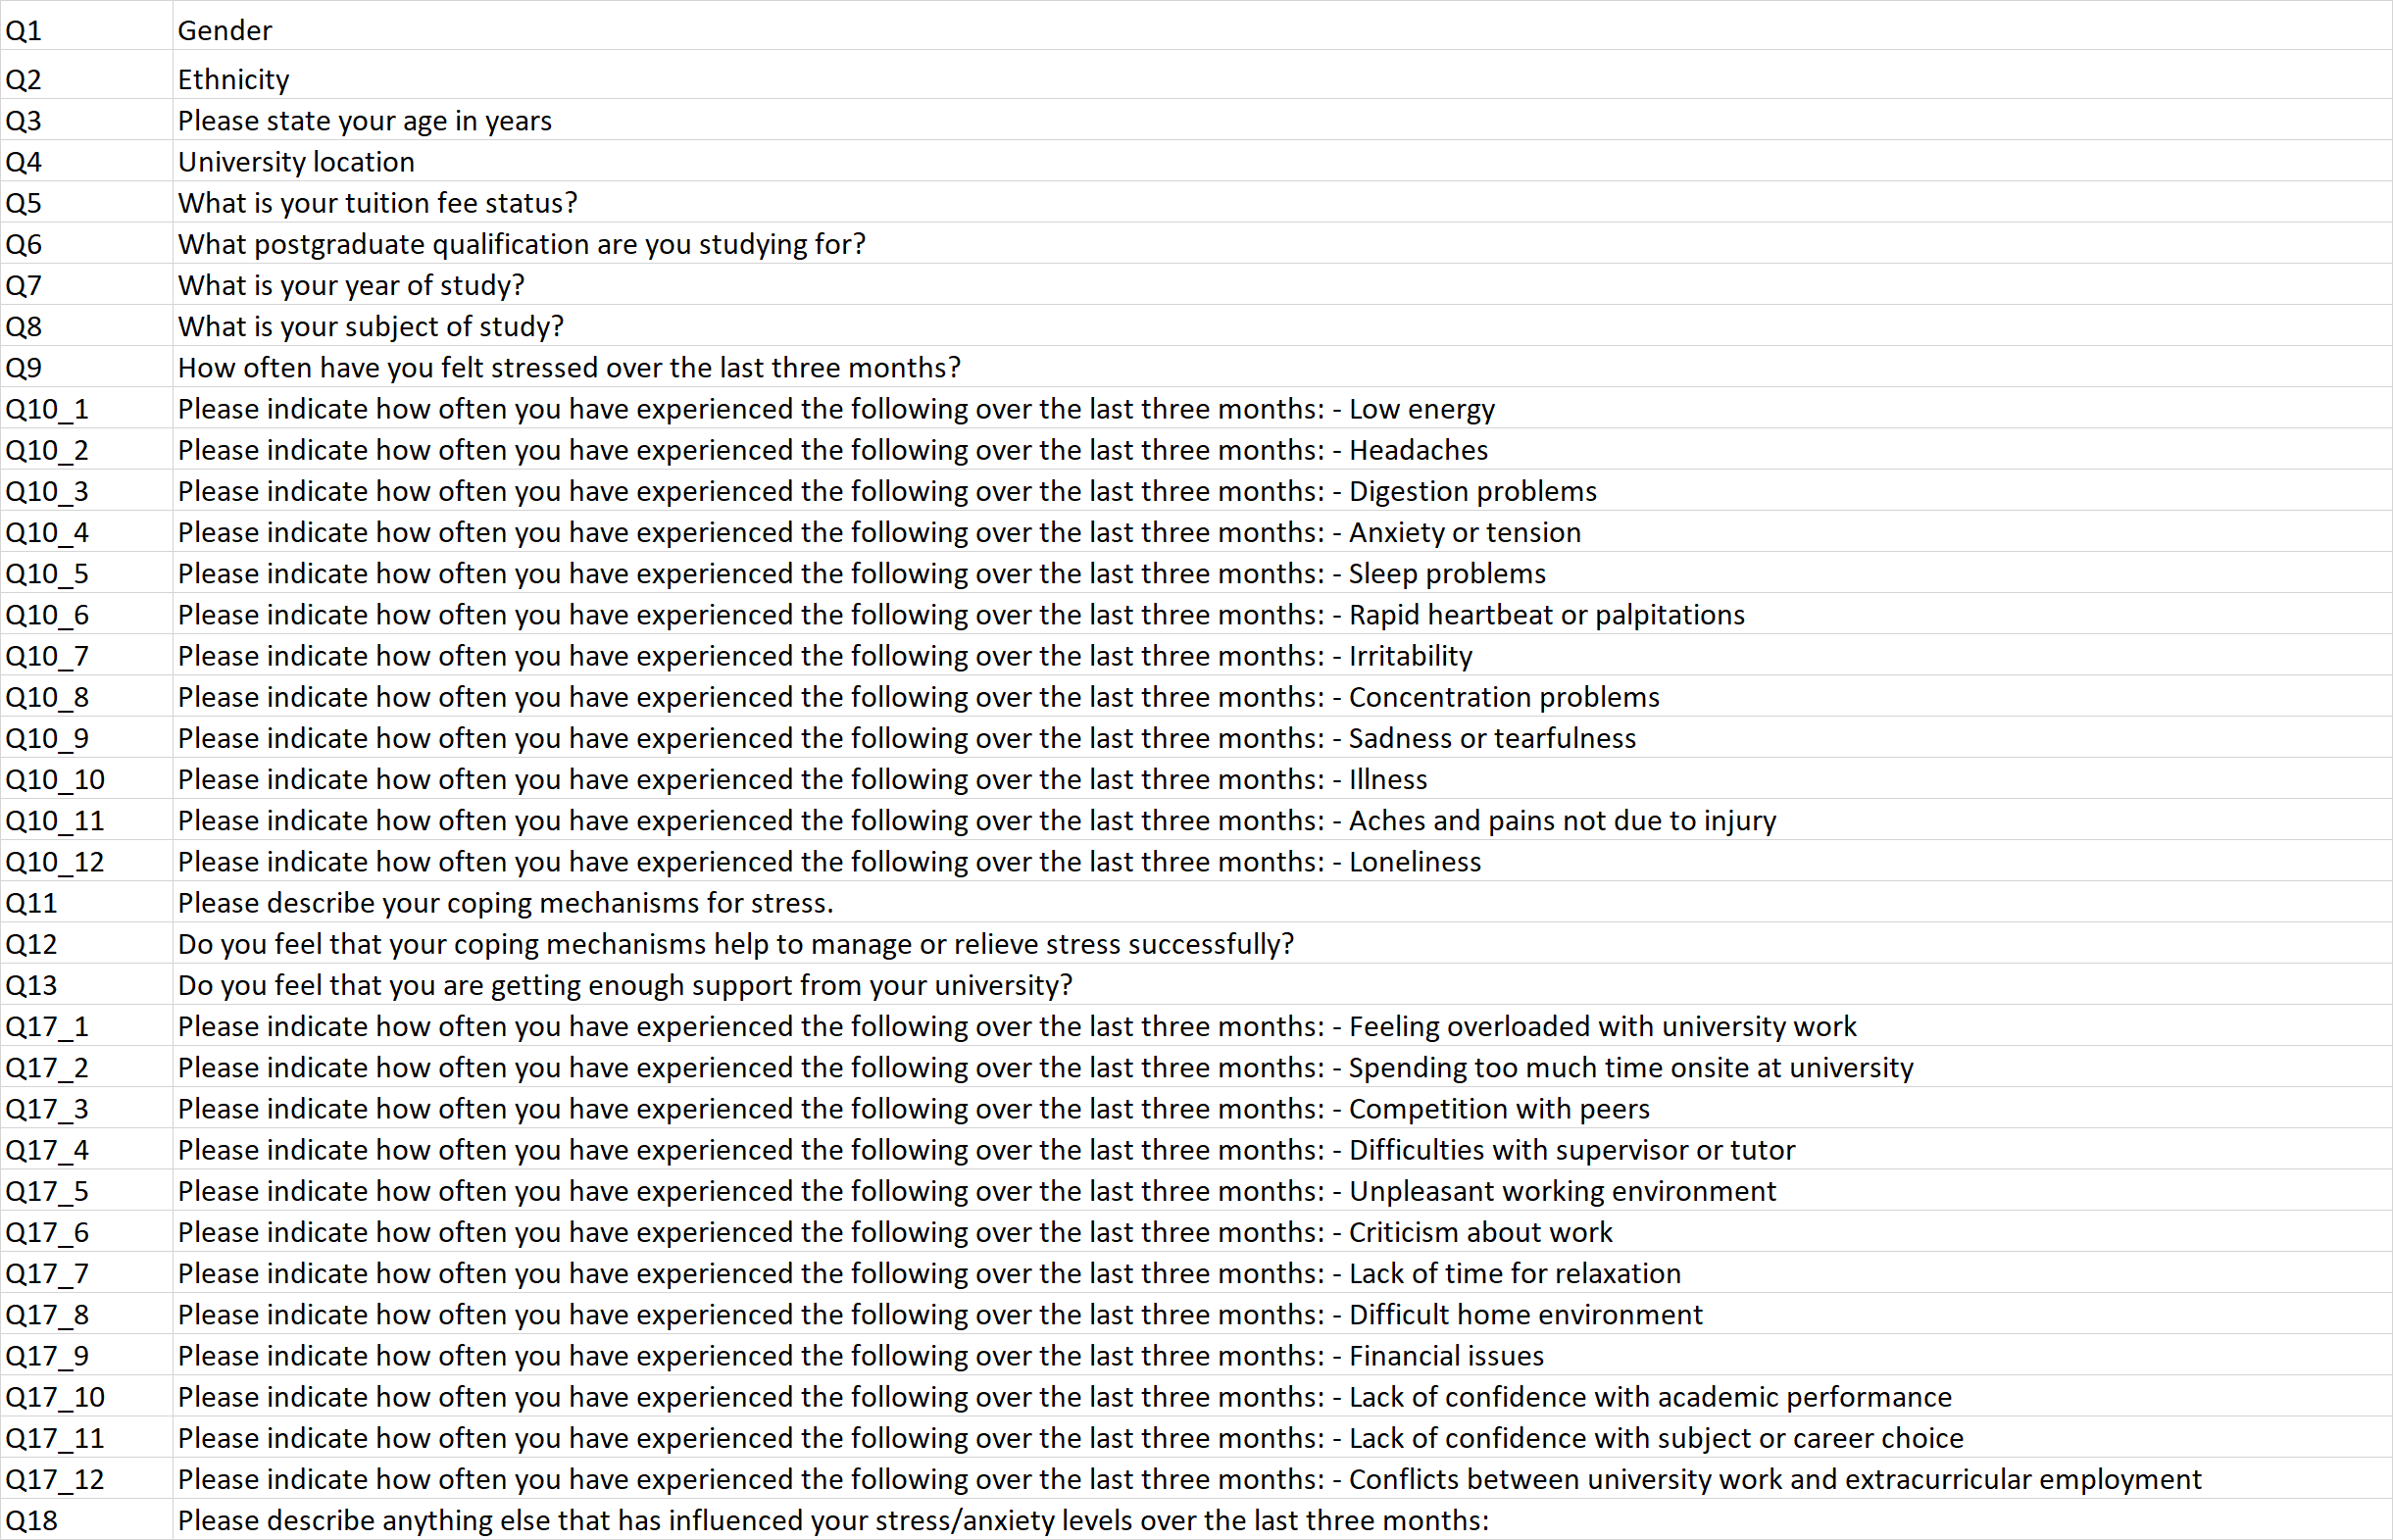

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint


Load dataset from URL

In [4]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Dani-elaqh/PiRates.Stress/main/dataset.csv')

## EDA (Exploratory Data Analysis)

Start explore the data

First step check how many observations and features has the data

In [5]:
print(dataset.shape)

(218, 36)


Let's take a look at 10 samples observations

In [6]:
dataset.sample(10)

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q9,Q10_1,Q10_2,...,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q18
116,Female,White,25,EU,PhD,3,Life sciences,To a large extent,Fairly often,Fairly often,...,Fairly often,Never,Almost never,Almost never,Sometimes,Sometimes,Fairly often,Sometimes,Never,NaN
37,Female,White,27,EU,PhD,4,Life sciences,To a large extent,Fairly often,Almost never,...,Never,Never,Never,Sometimes,Never,Never,Fairly often,Very often,Never,Writing my thesis
119,Female,Other,35,International,PhD,Other,Education,To a large extent,Sometimes,Sometimes,...,Almost never,Almost never,Sometimes,Fairly often,Almost never,Sometimes,Very often,Very often,Sometimes,NaN
91,Female,White,36,UK,PhD,4,Life sciences,Somewhat,Fairly often,Almost never,...,Almost never,Never,Almost never,Sometimes,Never,Almost never,Fairly often,Almost never,Never,NaN
44,Female,White,28,International,PhD,1,Other,To a large extent,Fairly often,Sometimes,...,Sometimes,Never,Almost never,Almost never,Almost never,Almost never,Fairly often,Almost never,Almost never,"Just moved to a new city, trying to make new f..."
68,Female,White,24,UK,PhD,1,Arts and humanities,To a large extent,Fairly often,Fairly often,...,Never,Almost never,Sometimes,Fairly often,Almost never,Fairly often,Very often,Sometimes,Very often,I am getting married in 6 months and recently ...
207,Male,White,25,UK,PhD,2,Engineering and technology,To a large extent,Sometimes,Almost never,...,Almost never,Never,Almost never,Almost never,Fairly often,Never,Very often,Almost never,Never,"Home issues, social anxiety causing loneliness."
96,Female,White,22,UK,Taught master's degree,1,Psychology,To a large extent,Fairly often,Almost never,...,Fairly often,Never,Never,Sometimes,Almost never,Very often,Fairly often,Almost never,Very often,Finding a job after graduating
201,Male,White,38,UK,PhD,Other,Life sciences,To a large extent,Very often,Fairly often,...,Sometimes,Very often,Sometimes,Sometimes,Never,Never,Fairly often,Fairly often,Very often,I am a full time employee of the health service
73,Female,White,22,UK,PhD,3,Engineering and technology,To a large extent,Fairly often,Fairly often,...,Almost never,Sometimes,Sometimes,Sometimes,Never,Fairly often,Very often,Fairly often,Almost never,"Being on a placement, away from my friends and..."


### Type of data (Numerical or Categorical?)

Identify which features are numerical and which are categorical

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q1      218 non-null    object
 1   Q2      218 non-null    object
 2   Q3      218 non-null    int64 
 3   Q5      218 non-null    object
 4   Q6      218 non-null    object
 5   Q7      218 non-null    object
 6   Q8      218 non-null    object
 7   Q9      218 non-null    object
 8   Q10_1   218 non-null    object
 9   Q10_2   218 non-null    object
 10  Q10_3   218 non-null    object
 11  Q10_4   218 non-null    object
 12  Q10_5   218 non-null    object
 13  Q10_6   218 non-null    object
 14  Q10_7   218 non-null    object
 15  Q10_8   218 non-null    object
 16  Q10_9   218 non-null    object
 17  Q10_10  218 non-null    object
 18  Q10_11  218 non-null    object
 19  Q10_12  218 non-null    object
 20  Q11     218 non-null    object
 21  Q12     218 non-null    object
 22  Q13     218 non-null    ob

**Note** that only one feature (Q3 = Age) has numerical values

### Missing Values

In [8]:
# NaN occurrences in Columns

print(dataset.isnull().sum(axis = 0))

Q1         0
Q2         0
Q3         0
Q5         0
Q6         0
Q7         0
Q8         0
Q9         0
Q10_1      0
Q10_2      0
Q10_3      0
Q10_4      0
Q10_5      0
Q10_6      0
Q10_7      0
Q10_8      0
Q10_9      0
Q10_10     0
Q10_11     0
Q10_12     0
Q11        0
Q12        0
Q13        0
Q17_1      0
Q17_2      0
Q17_3      0
Q17_4      0
Q17_5      0
Q17_6      0
Q17_7      0
Q17_8      0
Q17_9      0
Q17_10     0
Q17_11     0
Q17_12     0
Q18       74
dtype: int64


**There are 74 missing values in column Q18**

## Drop Features

create a copy of the dataset and drop features Q11, Q18 in the new dataset, because the information is irrelevant for the data analysis

In [9]:
dataset_1 = dataset.copy()

In [10]:
dataset_1.drop(columns =['Q11', 'Q18'], inplace = True)

In [11]:
dataset_1.sample(5)

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q9,Q10_1,Q10_2,...,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12
143,Female,White,1987,International,Other,2,Law,To a large extent,Sometimes,Almost never,...,Sometimes,Never,Almost never,Almost never,Sometimes,Never,Sometimes,Sometimes,Almost never,Almost never
56,Female,White,29,UK,PhD,1,Life sciences,To a large extent,Fairly often,Sometimes,...,Fairly often,Sometimes,Almost never,Almost never,Fairly often,Fairly often,Almost never,Very often,Fairly often,Never
215,Male,White,30,International,PhD,1,Life sciences,Somewhat,Sometimes,Sometimes,...,Never,Never,Never,Almost never,Very often,Sometimes,Fairly often,Fairly often,Very often,Never
159,Female,White,26,UK,Taught master's degree,1,Life sciences,Completely,Very often,Sometimes,...,Fairly often,Fairly often,Fairly often,Sometimes,Fairly often,Sometimes,Sometimes,Very often,Sometimes,Never
212,Male,White,56,UK,PhD,2,Life sciences,To a small extent,Sometimes,Never,...,Almost never,Almost never,Almost never,Almost never,Fairly often,Almost never,Sometimes,Sometimes,Sometimes,Fairly often


In [12]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q1      218 non-null    object
 1   Q2      218 non-null    object
 2   Q3      218 non-null    int64 
 3   Q5      218 non-null    object
 4   Q6      218 non-null    object
 5   Q7      218 non-null    object
 6   Q8      218 non-null    object
 7   Q9      218 non-null    object
 8   Q10_1   218 non-null    object
 9   Q10_2   218 non-null    object
 10  Q10_3   218 non-null    object
 11  Q10_4   218 non-null    object
 12  Q10_5   218 non-null    object
 13  Q10_6   218 non-null    object
 14  Q10_7   218 non-null    object
 15  Q10_8   218 non-null    object
 16  Q10_9   218 non-null    object
 17  Q10_10  218 non-null    object
 18  Q10_11  218 non-null    object
 19  Q10_12  218 non-null    object
 20  Q12     218 non-null    object
 21  Q13     218 non-null    object
 22  Q17_1   218 non-null    ob

### Statistics of the features

In [13]:
dataset_1.describe()

,Q3
count,218.000000
mean,36.550459
std,132.862771
min,21.000000
25%,24.000000
50%,26.000000
75%,29.000000
max,1987.000000


Only shows the statistical data of the attribute Q3 that is the only numeric one so far.

### Outliers

show all outliers in the dataset

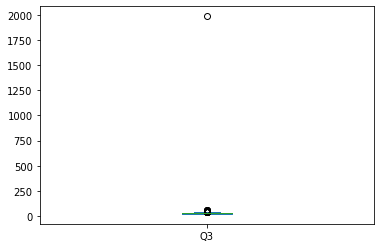

In [14]:
dataset_1.plot(kind='box', subplots=True, layout=(1,1), sharex=False, sharey=False)
plt.show()

Text(0.5, 1.0, 'Year of study (Q7) vs age (Q3) by gender')

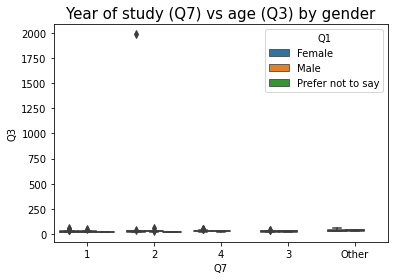

In [15]:
#BOX PLOT

sns.boxplot(x='Q7', y='Q3', data=dataset, hue='Q1')
plt.title('Year of study (Q7) vs age (Q3) by gender', fontsize=15)

The data presents outliers in the Q3 feature corresponding to age.

### Fixing outliers

In [16]:
dataset_1['Q3'].value_counts()

26      32
24      29
25      27
22      24
29      20
23      15
27      12
28      11
31       7
30       7
36       4
32       3
33       3
21       3
39       3
35       3
34       3
48       2
43       2
58       1
53       1
63       1
1987     1
50       1
38       1
40       1
56       1
Name: Q3, dtype: int64

It was identified that the outlier is in relation to the fact that they put the year of birth and not the age, this data has to be replaced by the correct age

In [17]:
dataset_1['Q3'] = dataset_1['Q3'].replace(1987, 33)

In [18]:
##dataset_1['Q3'] = dataset_1['Q3'].replace(1987, dataset_1['Q3'].mode()[0])

Text(0.5, 1.0, 'Year of study (Q7) vs age (Q3) by gender')

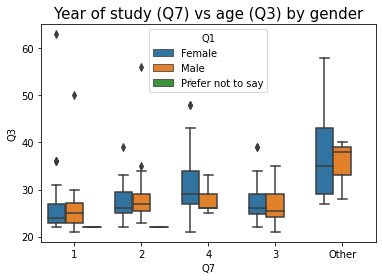

In [19]:
#BOX PLOT

sns.boxplot(x='Q7', y='Q3', data=dataset_1, hue='Q1')
plt.title('Year of study (Q7) vs age (Q3) by gender', fontsize=15)

### Converting the categorical feature into numerical

In [20]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q1      218 non-null    object
 1   Q2      218 non-null    object
 2   Q3      218 non-null    int64 
 3   Q5      218 non-null    object
 4   Q6      218 non-null    object
 5   Q7      218 non-null    object
 6   Q8      218 non-null    object
 7   Q9      218 non-null    object
 8   Q10_1   218 non-null    object
 9   Q10_2   218 non-null    object
 10  Q10_3   218 non-null    object
 11  Q10_4   218 non-null    object
 12  Q10_5   218 non-null    object
 13  Q10_6   218 non-null    object
 14  Q10_7   218 non-null    object
 15  Q10_8   218 non-null    object
 16  Q10_9   218 non-null    object
 17  Q10_10  218 non-null    object
 18  Q10_11  218 non-null    object
 19  Q10_12  218 non-null    object
 20  Q12     218 non-null    object
 21  Q13     218 non-null    object
 22  Q17_1   218 non-null    ob

**35 out of 36 features are objects, all columns must be evaluated and replaced by numerical data.**

In [21]:
dataset_1['Q1'].value_counts()

Female               161
Male                  55
Prefer not to say      2
Name: Q1, dtype: int64

In [22]:
dataset_1['Q1'].unique()

array(['Female', 'Male', 'Prefer not to say'], dtype=object)

In [23]:
##dataset_1['Q1'].map({'Female':1, 'Male':2, 'Prefer not to say':3})

In [24]:
dataset_1['Q1'].replace(('Female', 'Male', 'Prefer not to say'),(1, 2, 3), inplace = True)

In [25]:
dataset_1.sample(5)

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q9,Q10_1,Q10_2,...,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12
76,1,White,24,UK,PhD,3,Other,Somewhat,Sometimes,Almost never,...,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Very often,Fairly often,Fairly often,Never
59,1,White,24,EU,PhD,1,Arts and humanities,Somewhat,Sometimes,Sometimes,...,Sometimes,Never,Almost never,Never,Never,Never,Almost never,Sometimes,Never,Never
209,2,Asian / Asian British,22,UK,Research master's degree,1,Life sciences,To a large extent,Sometimes,Almost never,...,Never,Sometimes,Almost never,Fairly often,Very often,Almost never,Very often,Very often,Very often,Sometimes
187,2,Other,27,International,PhD,1,Other,Somewhat,Sometimes,Never,...,Sometimes,Almost never,Almost never,Almost never,Sometimes,Never,Fairly often,Sometimes,Almost never,Never
164,2,Other,22,UK,PhD,1,Life sciences,Completely,Sometimes,Very often,...,Sometimes,Fairly often,Almost never,Sometimes,Fairly often,Almost never,Sometimes,Fairly often,Fairly often,Never


In [26]:
dataset_1['Q2'].value_counts()

White                                          174
Mixed / Multiple Ethnic Groups                  15
Asian / Asian British                           14
Other                                           11
Black / African / Caribbean / Black British      4
Name: Q2, dtype: int64

In [27]:
dataset_1['Q2'].unique()

array(['White', 'Mixed / Multiple Ethnic Groups', 'Asian / Asian British',
       'Other', 'Black / African / Caribbean / Black British'],
      dtype=object)

In [28]:
dataset_1['Q2'].replace(('White', 'Mixed / Multiple Ethnic Groups', 'Asian / Asian British','Other', 
                         'Black / African / Caribbean / Black British'),(1, 2, 3, 4, 5), inplace = True)

In [29]:
dataset_1['Q3'].value_counts()

26    32
24    29
25    27
22    24
29    20
23    15
27    12
28    11
31     7
30     7
36     4
33     4
32     3
21     3
39     3
35     3
34     3
48     2
43     2
58     1
53     1
63     1
50     1
38     1
40     1
56     1
Name: Q3, dtype: int64

### Group ages into ranges

The feature Q3 (Age) will have to be classified by ranges so as not to have many values that can cause noise in the data analysis.

In [30]:
bins = [0, 20, 25, 30, 35, 40, 65]

In [31]:
names = [1, 2, 3, 4, 5, 6]

In [32]:
dataset_1['Q3'] = pd.cut(dataset_1['Q3'], bins, labels = names)

In [33]:
dataset_1['Q3'].replace(('1', '2', '3', '4', '5', '6'),(1, 2, 3, 4, 5, 6), inplace = True)

**Convert Q3 (Age) Categorical data to Integer**

In [34]:
dataset_1.iloc[:, 2 ] = dataset_1.iloc[:, 2 ].astype(float).astype(int)

In [35]:
dataset_1['Q3'].value_counts()

2    98
3    82
4    20
6     9
5     9
Name: Q3, dtype: int64

In [36]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q1      218 non-null    int64 
 1   Q2      218 non-null    int64 
 2   Q3      218 non-null    int32 
 3   Q5      218 non-null    object
 4   Q6      218 non-null    object
 5   Q7      218 non-null    object
 6   Q8      218 non-null    object
 7   Q9      218 non-null    object
 8   Q10_1   218 non-null    object
 9   Q10_2   218 non-null    object
 10  Q10_3   218 non-null    object
 11  Q10_4   218 non-null    object
 12  Q10_5   218 non-null    object
 13  Q10_6   218 non-null    object
 14  Q10_7   218 non-null    object
 15  Q10_8   218 non-null    object
 16  Q10_9   218 non-null    object
 17  Q10_10  218 non-null    object
 18  Q10_11  218 non-null    object
 19  Q10_12  218 non-null    object
 20  Q12     218 non-null    object
 21  Q13     218 non-null    object
 22  Q17_1   218 non-null    ob

In [37]:
dataset_1['Q5'].replace(('EU', 'International', 'UK'),(1, 2, 1), inplace = True)

In [38]:
dataset_1['Q5'].value_counts()

1    185
2     33
Name: Q5, dtype: int64

In [39]:
dataset_1['Q6'].replace(("Other", "PhD", "Research master's degree","Taught master's degree"),(0, 1, 2, 3), inplace = True)

In [40]:
dataset_1['Q6'].value_counts()

1    160
3     41
2     12
0      5
Name: Q6, dtype: int64

In [41]:
dataset_1['Q7'].replace(('1','2', '3','4','Other'),(1, 2, 3, 4, 1), inplace = True)

In [42]:
dataset_1['Q7'].value_counts()

1    108
2     44
3     38
4     28
Name: Q7, dtype: int64

In [43]:
dataset_1['Q8'].unique()

array(['Arts and humanities', 'Computer science', 'Life sciences',
       'Physical science', 'Social sciences',
       'Engineering and technology', 'Clinical, pre-clinical and health',
       'Education', 'Other', 'Law', 'Psychology'], dtype=object)

In [44]:
dataset_1['Q8'].replace(('Arts and humanities', 'Computer science', 'Life sciences',
       'Physical science', 'Social sciences',
       'Engineering and technology', 'Clinical, pre-clinical and health',
       'Education', 'Other', 'Law', 'Psychology'),(1, 3, 6, 8, 7, 3, 2, 4, 10, 5, 9), inplace = True)

In [45]:
dataset_1['Q8'].value_counts()

6     80
1     42
9     17
7     15
10    15
3     13
2     13
8     11
5      7
4      5
Name: Q8, dtype: int64

In [46]:
dataset_1['Q9'].unique()

array(['To a large extent', 'Somewhat', 'Completely', 'To a small extent'],
      dtype=object)

In [47]:
dataset_1['Q9'].replace(('To a large extent', 'Somewhat', 'Completely', 'To a small extent', 'not at all'),
                        (4, 3, 5, 2, 1), inplace = True)

In [48]:
dataset_1['Q9'].value_counts()

4    120
3     55
5     36
2      7
Name: Q9, dtype: int64

In [49]:
dataset_1.sample(3)

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q9,Q10_1,Q10_2,...,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12
157,1,1,2,1,3,1,1,5,Very often,Fairly often,...,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Almost never,Very often,Fairly often,Fairly often,Very often
19,1,1,2,1,1,3,6,5,Very often,Sometimes,...,Very often,Sometimes,Fairly often,Never,Sometimes,Never,Sometimes,Very often,Very often,Never
5,1,1,2,1,3,1,8,3,Fairly often,Almost never,...,Very often,Sometimes,Very often,Sometimes,Very often,Almost never,Fairly often,Sometimes,Fairly often,Never


In [50]:
dataset_1['Q10_1'].unique()

array(['Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'],
      dtype=object)

In [51]:
dataset_1['Q10_1'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),(3, 4, 1, 5, 2), 
                           inplace = True)

In [52]:
dataset_1['Q10_2'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),(3, 4, 1, 5, 2), 
                           inplace = True)

In [53]:
dataset_1['Q10_3'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),(3, 4, 1, 5, 2), 
                           inplace = True)

In [54]:
dataset_1['Q10_4'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),(3, 4, 1, 5, 2), 
                          inplace = True)

In [55]:
dataset_1['Q10_5'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),
                        (3, 4, 1, 5, 2), inplace = True)

In [56]:
dataset_1['Q10_6'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),
                        (3, 4, 1, 5, 2), inplace = True)

In [57]:
dataset_1['Q10_7'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),
                        (3, 4, 1, 5, 2), inplace = True)

In [58]:
dataset_1['Q10_8'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),
                        (3, 4, 1, 5, 2), inplace = True)

In [59]:
dataset_1['Q10_9'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),
                        (3, 4, 1, 5, 2), inplace = True)

In [60]:
dataset_1['Q10_10'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),
                        (3, 4, 1, 5, 2), inplace = True)

In [61]:
dataset_1['Q10_11'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),
                        (3, 4, 1, 5, 2), inplace = True)

In [62]:
dataset_1['Q10_12'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),
                        (3, 4, 1, 5, 2), inplace = True)

In [63]:
dataset_1['Q10_12'].value_counts()

3    72
2    53
4    38
1    36
5    19
Name: Q10_12, dtype: int64

In [64]:
dataset_1['Q12'].unique()

array(['Yes', 'Not sure', 'No'], dtype=object)

In [65]:
dataset_1['Q12'].replace(('Yes', 'Not sure', 'No'),(1, 3, 2), inplace = True)

In [66]:
dataset_1['Q12'].value_counts()

1    91
3    91
2    36
Name: Q12, dtype: int64

In [67]:
dataset_1['Q13'].unique()

array(['Yes', 'Not sure', 'No'], dtype=object)

In [68]:
dataset_1['Q13'].replace(('Yes', 'Not sure', 'No'),(1, 3, 2), inplace = True)

In [69]:
dataset_1['Q17_1'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_2'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_3'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_4'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_5'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_6'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_7'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_8'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_9'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_10'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_11'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_12'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)

### Verify all changes made to the dataset

**All features are numerical data**

In [70]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q1      218 non-null    int64
 1   Q2      218 non-null    int64
 2   Q3      218 non-null    int32
 3   Q5      218 non-null    int64
 4   Q6      218 non-null    int64
 5   Q7      218 non-null    int64
 6   Q8      218 non-null    int64
 7   Q9      218 non-null    int64
 8   Q10_1   218 non-null    int64
 9   Q10_2   218 non-null    int64
 10  Q10_3   218 non-null    int64
 11  Q10_4   218 non-null    int64
 12  Q10_5   218 non-null    int64
 13  Q10_6   218 non-null    int64
 14  Q10_7   218 non-null    int64
 15  Q10_8   218 non-null    int64
 16  Q10_9   218 non-null    int64
 17  Q10_10  218 non-null    int64
 18  Q10_11  218 non-null    int64
 19  Q10_12  218 non-null    int64
 20  Q12     218 non-null    int64
 21  Q13     218 non-null    int64
 22  Q17_1   218 non-null    int64
 23  Q17_2   218 non

In [71]:
dataset_1.sample(5)

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q9,Q10_1,Q10_2,...,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12
113,1,3,3,1,1,3,10,3,3,3,...,2,1,3,2,3,1,3,3,3,2
70,1,1,3,1,1,1,6,4,3,4,...,2,2,2,2,4,3,3,3,1,1
49,1,1,2,1,2,1,1,4,4,2,...,3,2,2,2,4,4,5,4,4,4
129,1,1,2,1,1,2,3,4,5,2,...,3,1,1,1,4,2,3,4,2,1
28,1,1,3,1,1,1,7,5,4,4,...,3,2,3,3,3,2,2,5,5,4


**Statistics of the feature**

In [72]:
dataset_1.describe()

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q9,Q10_1,Q10_2,...,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,...,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,1.270642,1.422018,2.848624,1.151376,1.408257,1.935780,5.220183,3.848624,3.844037,2.995413,...,2.784404,2.344037,2.366972,2.399083,3.527523,2.288991,2.940367,3.880734,3.321101,2.366972
std,0.465551,0.948378,1.029529,0.359240,0.816492,1.088484,2.816534,0.724822,0.781990,1.013720,...,1.200743,1.146417,1.074725,1.021158,1.034731,1.204434,1.284837,1.035986,1.239747,1.424994
min,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.250000,3.000000,3.000000,2.000000,...,2.000000,1.000000,2.000000,2.000000,3.000000,1.000000,2.000000,3.000000,2.000000,1.000000
50%,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,6.000000,4.000000,4.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000
75%,2.000000,1.000000,3.000000,1.000000,1.000000,3.000000,7.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,5.000000,4.000000,3.750000
max,3.000000,5.000000,6.000000,2.000000,3.000000,4.000000,10.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Visualizations

Text(0.5, 1.0, 'Qty of students with Stress Level')

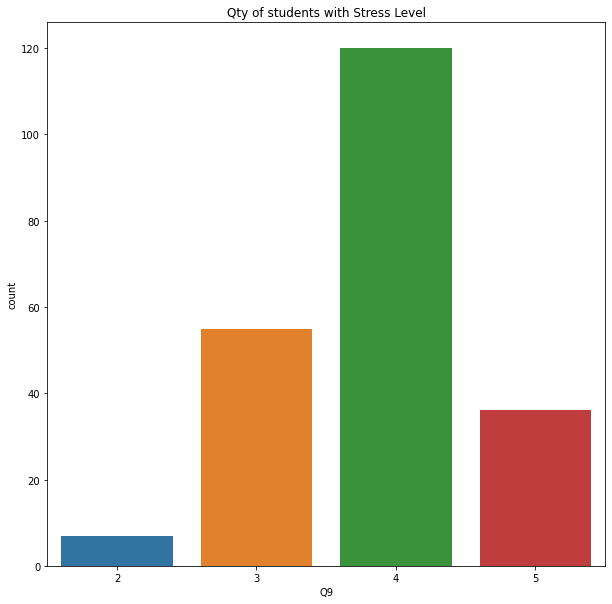

In [73]:
plt.figure(figsize=(10,10))
sns.countplot(x='Q9', data=dataset_1);
plt.title('Qty of students with Stress Level')

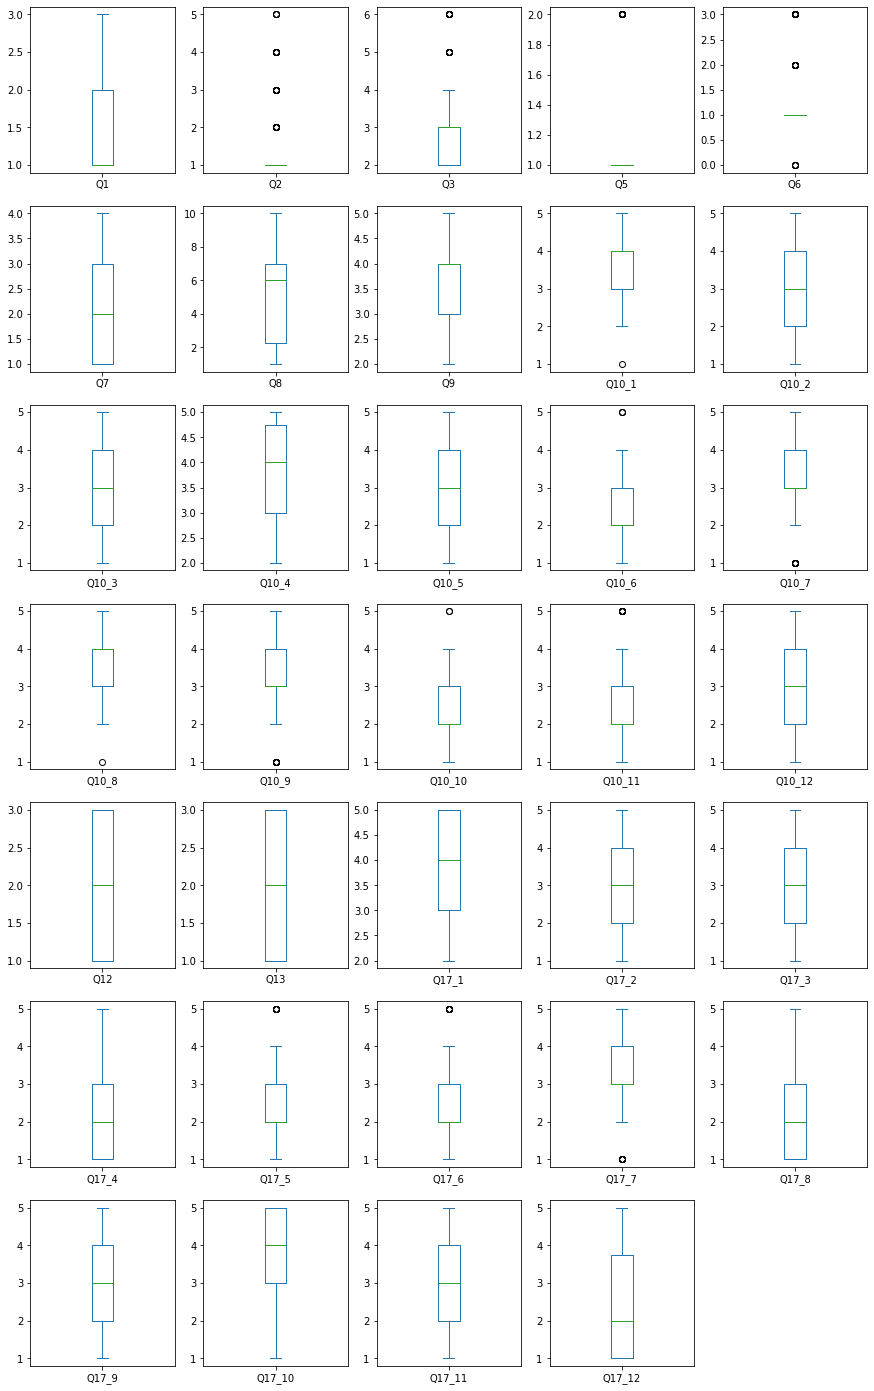

In [74]:
dataset_1.plot(kind='box', subplots=True, layout=(7,5), sharex=False, sharey=False, figsize=(15, 25))
plt.show()

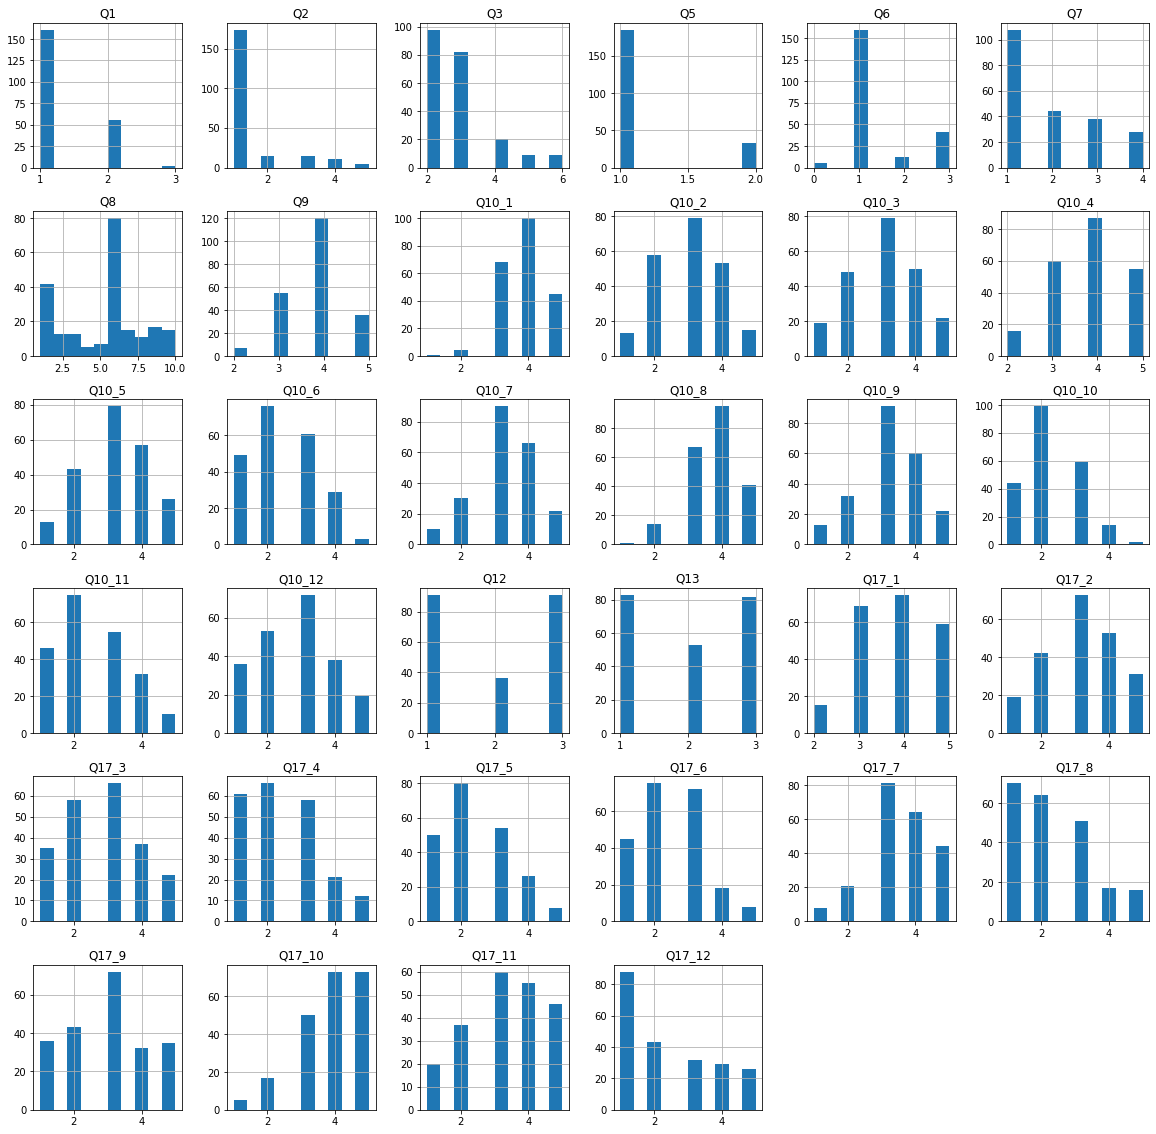

In [75]:
dataset_1.hist(figsize=(20, 20))
plt.show()

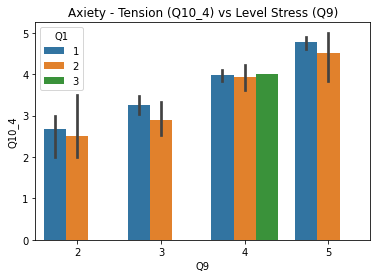

In [76]:
sns.barplot(x = 'Q9', y = 'Q10_4', data = dataset_1, hue = 'Q1' )
plt.title('Axiety - Tension (Q10_4) vs Level Stress (Q9)')
plt.show()

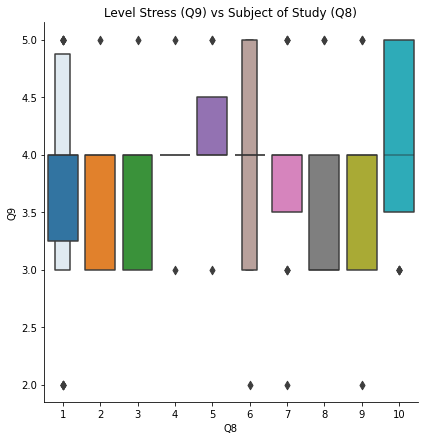

In [77]:
# Level stress vs subject of study
sns.catplot(y = "Q9", x = "Q8", data = dataset_1.sort_values("Q9", ascending = False), kind="boxen", height = 6, aspect = 1)
plt.title('Level Stress (Q9) vs Subject of Study (Q8)')
plt.show()

In [78]:
dataset_1

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q9,Q10_1,Q10_2,...,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12
0,1,1,3,2,1,1,1,4,3,2,...,1,1,1,1,3,1,1,5,2,1
1,1,1,3,1,1,2,3,3,4,3,...,2,1,3,3,3,1,3,3,3,1
2,1,1,6,1,1,4,1,4,4,2,...,4,2,3,2,5,1,5,2,3,4
3,1,2,3,1,1,4,1,3,3,3,...,1,2,1,2,3,3,2,3,3,2
4,1,1,2,1,2,1,6,3,3,2,...,2,2,2,3,3,1,1,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2,2,2,1,2,1,6,5,4,2,...,3,2,3,2,4,5,5,4,4,4
214,2,1,2,1,1,3,7,2,3,2,...,3,3,2,2,2,2,3,2,3,1
215,2,1,3,2,1,1,6,3,3,3,...,1,1,1,2,5,3,4,4,5,1
216,3,1,2,1,3,2,5,4,5,2,...,4,2,2,3,3,1,4,4,5,4


Text(0.5, 1.0, 'Stress level (Q9) vs Year of study (Q7) ')

<Figure size 576x288 with 0 Axes>

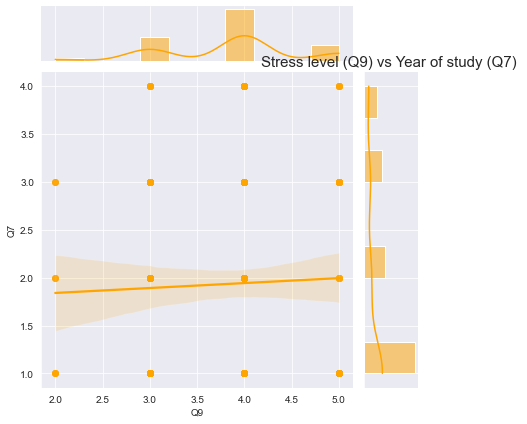

In [79]:
#Scatter plot

sns.set_style('darkgrid')
plt.figure(figsize=(8,4))
sns.jointplot(x='Q9', y='Q7', data=dataset_1, kind='reg', color='orange')
plt.title("Stress level (Q9) vs Year of study (Q7) ", fontsize=15)

### Correlations

In [80]:
corr1= dataset_1.corr()
corr1

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q9,Q10_1,Q10_2,...,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12
Q1,1.000000,-0.009384,-0.029506,-0.025658,-0.025303,-0.047388,-0.098372,-0.164819,-0.149343,-0.095003,...,-0.051769,-0.002574,-0.024420,-0.024678,-0.058583,-0.033288,-0.057640,-0.162080,-7.141970e-02,-0.060096
Q2,-0.009384,1.000000,0.226202,0.555565,-0.074745,0.071017,0.108246,0.086659,-0.022689,0.059543,...,-0.061370,0.145588,0.127674,0.177416,0.067942,0.037975,0.028312,0.070226,9.194541e-02,0.055372
Q3,-0.029506,0.226202,1.000000,0.348822,-0.216695,0.258582,-0.168036,-0.129657,-0.080976,-0.027162,...,-0.041433,-0.088423,0.017118,0.013894,-0.037167,-0.012871,-0.100919,-0.042929,-6.283617e-02,0.129133
Q5,-0.025658,0.555565,0.348822,1.000000,-0.133111,0.083901,0.007897,-0.000081,-0.128825,-0.023393,...,-0.116291,0.040806,-0.049058,0.048116,-0.017459,0.015585,-0.030273,-0.000795,-3.721192e-02,-0.027997
Q6,-0.025303,-0.074745,-0.216695,-0.133111,1.000000,-0.369625,0.092988,0.003679,-0.022513,0.013408,...,0.029087,0.080645,0.080557,-0.002865,-0.010634,0.104404,0.155098,-0.072923,7.476214e-02,0.235027
Q7,-0.047388,0.071017,0.258582,0.083901,-0.369625,1.000000,-0.138166,0.034349,0.047732,0.037319,...,-0.014168,-0.011757,0.012360,0.068770,0.132507,0.014222,-0.035702,0.025869,3.584139e-02,0.059829
Q8,-0.098372,0.108246,-0.168036,0.007897,0.092988,-0.138166,1.000000,0.054776,0.118186,-0.072275,...,-0.022690,0.113442,0.000587,-0.061136,-0.036876,-0.014768,-0.094410,-0.016228,-2.034113e-02,-0.230343
Q9,-0.164819,0.086659,-0.129657,-0.000081,0.003679,0.034349,0.054776,1.000000,0.470365,0.275009,...,0.295908,0.135059,0.207703,0.218970,0.395752,0.261489,0.079333,0.368613,2.389614e-01,0.174496
Q10_1,-0.149343,-0.022689,-0.080976,-0.128825,-0.022513,0.047732,0.118186,0.470365,1.000000,0.260691,...,0.356650,0.214340,0.271298,0.222578,0.318568,0.170395,0.105366,0.318234,2.705525e-01,0.171528
Q10_2,-0.095003,0.059543,-0.027162,-0.023393,0.013408,0.037319,-0.072275,0.275009,0.260691,1.000000,...,0.097618,0.116359,0.149597,0.197653,0.160478,0.099223,0.141314,0.139893,1.918519e-01,0.100065


**Get correlations of each features in a heatmap**

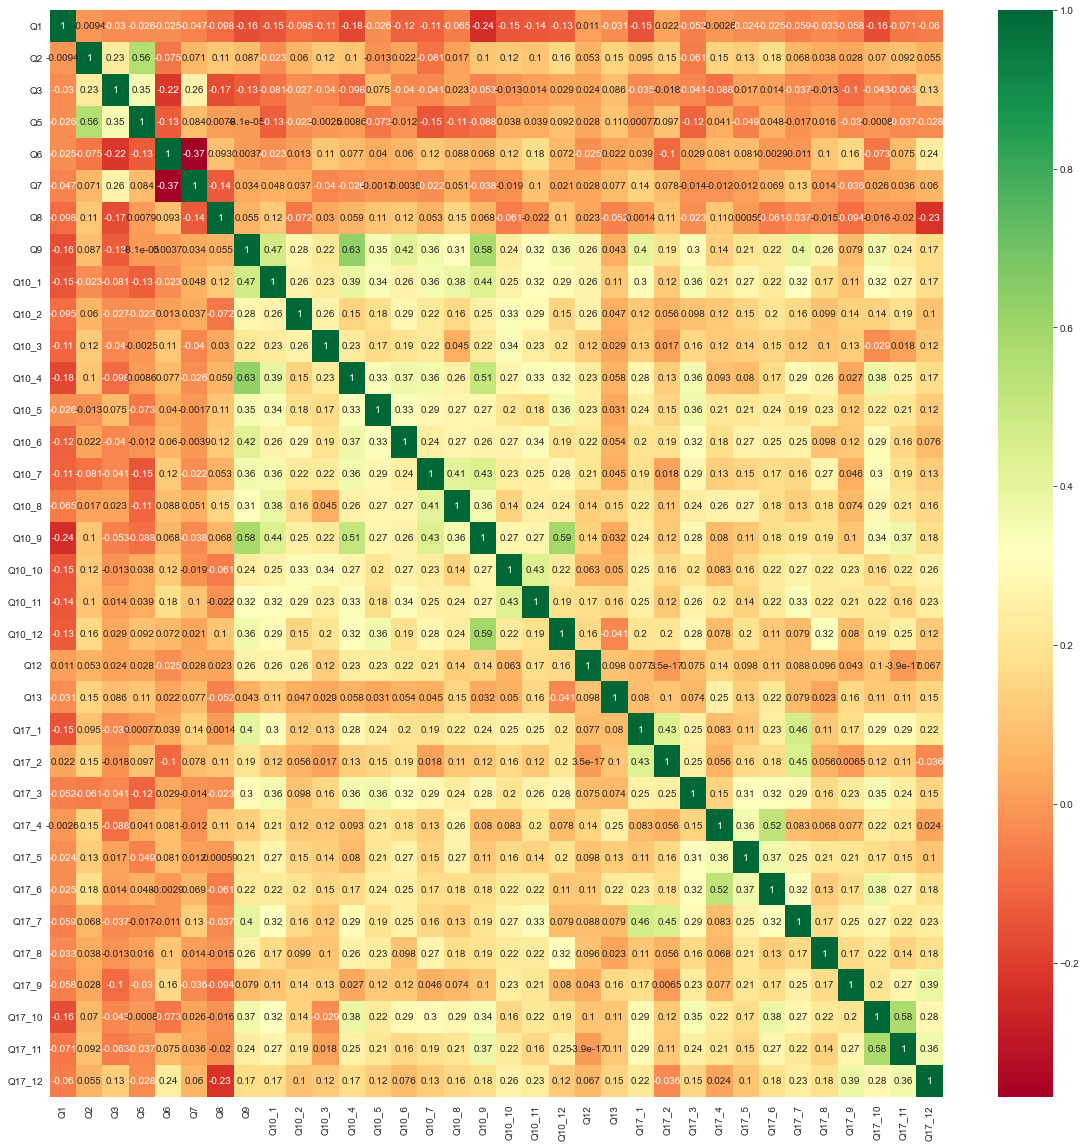

In [81]:
#sns.heatmap(corr1, annot=True)

top_corr_features = corr1.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(dataset_1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

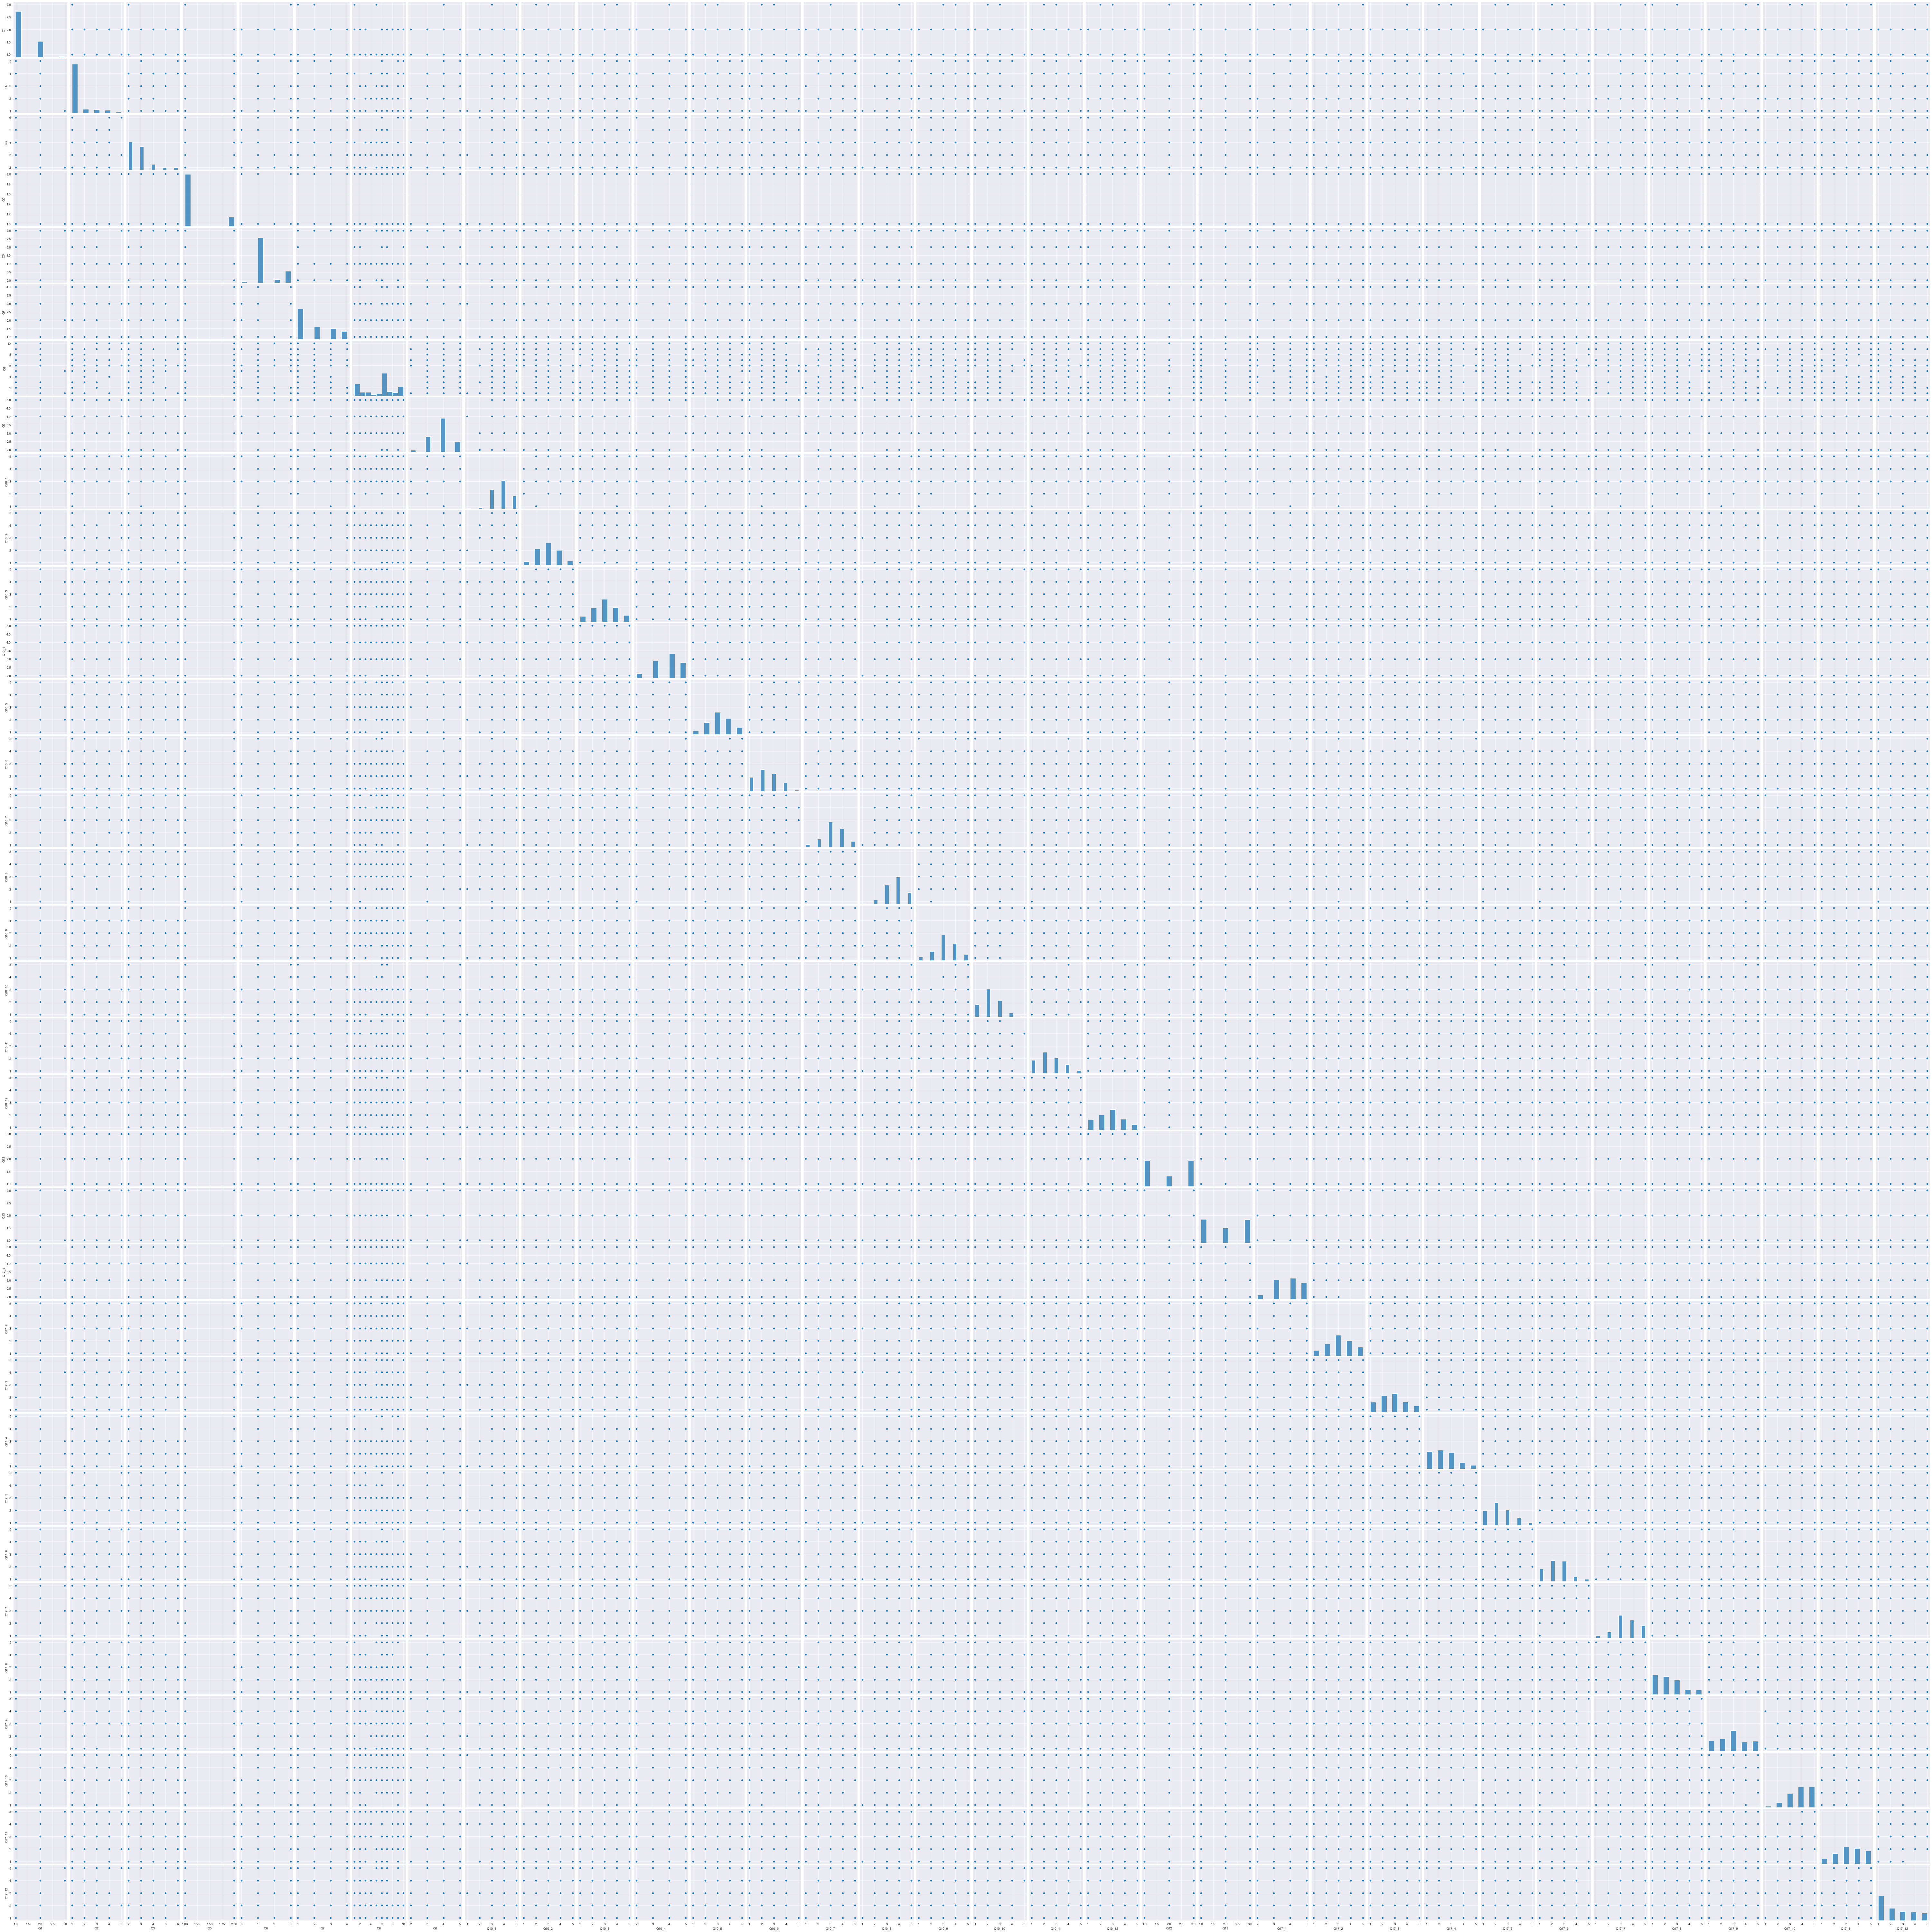

In [81]:
sns.pairplot(dataset_1)

## Reindex columns 

Reindex column Q9 (dependent feature) to the end that represents How is the stressed level over the last Semester.

In [82]:
dataset_1.sample(5)

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q9,Q10_1,Q10_2,...,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12
13,1,1,2,1,1,1,2,4,3,3,...,3,2,1,1,4,1,3,4,1,1
149,1,1,2,1,1,1,6,4,4,1,...,5,1,3,3,3,4,2,5,4,3
153,1,1,2,1,1,1,6,4,5,4,...,2,1,1,2,3,1,4,4,3,4
168,2,4,3,1,1,1,6,3,4,3,...,1,4,3,3,3,1,4,4,2,1
17,1,1,4,2,1,2,1,4,3,5,...,2,1,2,3,3,4,4,4,3,2


In [83]:
dataset_1.columns

Index(['Q1', 'Q2', 'Q3', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10_1', 'Q10_2',
       'Q10_3', 'Q10_4', 'Q10_5', 'Q10_6', 'Q10_7', 'Q10_8', 'Q10_9', 'Q10_10',
       'Q10_11', 'Q10_12', 'Q12', 'Q13', 'Q17_1', 'Q17_2', 'Q17_3', 'Q17_4',
       'Q17_5', 'Q17_6', 'Q17_7', 'Q17_8', 'Q17_9', 'Q17_10', 'Q17_11',
       'Q17_12'],
      dtype='object')

In [84]:
dataset_1 = dataset_1.reindex(columns=['Q1', 'Q2', 'Q3', 'Q5', 'Q6', 'Q7', 'Q8', 'Q10_1', 'Q10_2',
       'Q10_3', 'Q10_4', 'Q10_5', 'Q10_6', 'Q10_7', 'Q10_8', 'Q10_9', 'Q10_10',
       'Q10_11', 'Q10_12', 'Q12', 'Q13', 'Q17_1', 'Q17_2', 'Q17_3', 'Q17_4',
       'Q17_5', 'Q17_6', 'Q17_7', 'Q17_8', 'Q17_9', 'Q17_10', 'Q17_11',
       'Q17_12', 'Q9'])

In [85]:
dataset_1.columns

Index(['Q1', 'Q2', 'Q3', 'Q5', 'Q6', 'Q7', 'Q8', 'Q10_1', 'Q10_2', 'Q10_3',
       'Q10_4', 'Q10_5', 'Q10_6', 'Q10_7', 'Q10_8', 'Q10_9', 'Q10_10',
       'Q10_11', 'Q10_12', 'Q12', 'Q13', 'Q17_1', 'Q17_2', 'Q17_3', 'Q17_4',
       'Q17_5', 'Q17_6', 'Q17_7', 'Q17_8', 'Q17_9', 'Q17_10', 'Q17_11',
       'Q17_12', 'Q9'],
      dtype='object')

In [86]:
dataset_1.sample(5)

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q10_1,Q10_2,Q10_3,...,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q9
42,1,1,3,1,3,1,9,4,3,3,...,2,2,2,3,3,4,3,3,4,3
182,2,3,3,2,1,3,3,3,4,2,...,2,2,3,3,2,3,3,3,4,4
87,1,1,2,1,1,3,1,4,3,3,...,3,1,4,3,2,3,5,5,4,5
64,1,1,2,1,1,1,8,4,4,3,...,3,1,3,2,3,2,4,3,1,4
58,1,2,2,1,3,1,1,4,3,3,...,3,3,3,4,2,5,5,5,5,5


### Feature Scaling

In [87]:
dataNorm = dataset_1.copy()

**Standardization Dataset**

In [88]:
scaling = StandardScaler()

In [89]:
data_stand = scaling.fit_transform(dataNorm)

In [90]:
data_stand = pd.DataFrame(data_stand)

In [91]:
data_stand.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
21,-0.582675,-0.446014,0.147373,-0.422349,-0.501164,0.979959,0.989235,1.481635,0.004535,-0.946178,...,0.573502,-0.342243,0.589821,-0.510990,-1.072668,0.046520,0.115388,0.548871,-0.258118,-1.173498
134,-0.582675,-0.446014,0.147373,-0.422349,-0.501164,0.979959,0.277508,1.481635,0.004535,0.879192,...,-0.300788,-0.342243,-0.391713,-0.510990,2.256037,1.606720,1.082873,1.357344,1.851998,0.209327
174,1.570260,-0.446014,-0.826181,-0.422349,-0.501164,-0.861688,0.989235,0.199903,0.004535,-0.033493,...,-1.175078,-1.274855,-1.373247,-0.510990,-1.072668,-0.733581,-0.852097,-1.068074,-0.961490,-1.173498
89,-0.582675,-0.446014,1.120927,-0.422349,-0.501164,1.900783,-1.501809,0.199903,0.993271,-0.033493,...,-0.300788,0.590369,0.589821,0.457669,0.591685,-0.733581,0.115388,0.548871,1.148626,0.209327
77,-0.582675,-0.446014,-0.826181,-0.422349,0.726406,-0.861688,1.700962,1.481635,0.993271,-0.946178,...,-0.300788,-1.274855,-1.373247,1.426329,-1.072668,0.826620,1.082873,0.548871,-0.961490,1.592151


**Normalize Dataset**

In [92]:
scalingMinMax=MinMaxScaler()

In [93]:
data_scaled = scalingMinMax.fit_transform(dataNorm)

In [94]:
data_scaled = pd.DataFrame(data_scaled)

In [95]:
data_scaled.head(5)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.0,0.00,0.25,1.0,0.333333,0.000000,0.000000,0.50,0.25,0.00,...,0.00,0.00,0.00,0.5,0.0,0.00,1.00,0.25,0.00,0.666667
1,0.0,0.00,0.25,0.0,0.333333,0.333333,0.222222,0.75,0.50,1.00,...,0.00,0.50,0.50,0.5,0.0,0.50,0.50,0.50,0.00,0.333333
2,0.0,0.00,1.00,0.0,0.333333,1.000000,0.000000,0.75,0.25,0.50,...,0.25,0.50,0.25,1.0,0.0,1.00,0.25,0.50,0.75,0.666667
3,0.0,0.25,0.25,0.0,0.333333,1.000000,0.000000,0.50,0.50,0.25,...,0.25,0.00,0.25,0.5,0.5,0.25,0.50,0.50,0.25,0.333333
4,0.0,0.00,0.00,0.0,0.666667,0.000000,0.555556,0.50,0.25,0.50,...,0.25,0.25,0.50,0.5,0.0,0.00,0.50,0.75,0.50,0.333333


**Normalize Dataset with MinMax**

In [96]:
dataset_minmax = dataNorm.apply(lambda x: (x - x.min(axis = 0))/ (x.max(axis=0)- x.min(axis=0)))

In [97]:
dataset_minmax

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q10_1,Q10_2,Q10_3,...,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q9
0,0.0,0.00,0.25,1.0,0.333333,0.000000,0.000000,0.50,0.25,0.00,...,0.00,0.00,0.00,0.50,0.00,0.00,1.00,0.25,0.00,0.666667
1,0.0,0.00,0.25,0.0,0.333333,0.333333,0.222222,0.75,0.50,1.00,...,0.00,0.50,0.50,0.50,0.00,0.50,0.50,0.50,0.00,0.333333
2,0.0,0.00,1.00,0.0,0.333333,1.000000,0.000000,0.75,0.25,0.50,...,0.25,0.50,0.25,1.00,0.00,1.00,0.25,0.50,0.75,0.666667
3,0.0,0.25,0.25,0.0,0.333333,1.000000,0.000000,0.50,0.50,0.25,...,0.25,0.00,0.25,0.50,0.50,0.25,0.50,0.50,0.25,0.333333
4,0.0,0.00,0.00,0.0,0.666667,0.000000,0.555556,0.50,0.25,0.50,...,0.25,0.25,0.50,0.50,0.00,0.00,0.50,0.75,0.50,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,0.5,0.25,0.00,0.0,0.666667,0.000000,0.555556,0.75,0.25,0.50,...,0.25,0.50,0.25,0.75,1.00,1.00,0.75,0.75,0.75,1.000000
214,0.5,0.00,0.00,0.0,0.333333,0.666667,0.666667,0.50,0.25,0.50,...,0.50,0.25,0.25,0.25,0.25,0.50,0.25,0.50,0.00,0.000000
215,0.5,0.00,0.25,1.0,0.333333,0.000000,0.555556,0.50,0.50,0.25,...,0.00,0.00,0.25,1.00,0.50,0.75,0.75,1.00,0.00,0.333333
216,1.0,0.00,0.00,0.0,1.000000,0.333333,0.444444,1.00,0.25,0.50,...,0.25,0.25,0.50,0.50,0.00,0.75,0.75,1.00,0.75,0.666667


In [98]:
dataset_minmax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Q1      218 non-null    float64
 1   Q2      218 non-null    float64
 2   Q3      218 non-null    float64
 3   Q5      218 non-null    float64
 4   Q6      218 non-null    float64
 5   Q7      218 non-null    float64
 6   Q8      218 non-null    float64
 7   Q10_1   218 non-null    float64
 8   Q10_2   218 non-null    float64
 9   Q10_3   218 non-null    float64
 10  Q10_4   218 non-null    float64
 11  Q10_5   218 non-null    float64
 12  Q10_6   218 non-null    float64
 13  Q10_7   218 non-null    float64
 14  Q10_8   218 non-null    float64
 15  Q10_9   218 non-null    float64
 16  Q10_10  218 non-null    float64
 17  Q10_11  218 non-null    float64
 18  Q10_12  218 non-null    float64
 19  Q12     218 non-null    float64
 20  Q13     218 non-null    float64
 21  Q17_1   218 non-null    float64
 22  Q1

## Feature Selection

In [99]:
dataset_minmax.sample(5)

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q10_1,Q10_2,Q10_3,...,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q9
66,0.0,0.00,0.25,0.0,0.333333,0.333333,0.555556,0.75,0.50,0.75,...,0.50,0.75,0.25,0.50,0.25,0.50,0.75,0.75,0.00,0.666667
33,0.0,0.25,0.00,0.0,1.000000,0.000000,0.000000,0.50,0.75,0.25,...,0.00,0.50,0.00,0.50,0.00,1.00,0.75,1.00,0.00,0.000000
60,0.0,0.00,0.25,0.0,0.333333,0.000000,0.555556,0.75,1.00,0.75,...,0.75,0.50,0.50,0.75,0.00,0.25,1.00,1.00,0.25,0.666667
0,0.0,0.00,0.25,1.0,0.333333,0.000000,0.000000,0.50,0.25,0.00,...,0.00,0.00,0.00,0.50,0.00,0.00,1.00,0.25,0.00,0.666667
217,1.0,0.00,0.00,0.0,1.000000,0.000000,0.000000,0.50,0.50,0.75,...,0.50,0.50,0.25,1.00,0.50,1.00,0.50,0.50,1.00,0.666667


In [100]:
dataset_2 = dataset_minmax.copy().corr()

In [101]:
dataset_2

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q10_1,Q10_2,Q10_3,...,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q9
Q1,1.000000,-0.009384,-0.029506,-0.025658,-0.025303,-0.047388,-0.098372,-0.149343,-0.095003,-0.109651,...,-0.002574,-0.024420,-0.024678,-0.058583,-0.033288,-0.057640,-0.162080,-7.141970e-02,-0.060096,-0.164819
Q2,-0.009384,1.000000,0.226202,0.555565,-0.074745,0.071017,0.108246,-0.022689,0.059543,0.117802,...,0.145588,0.127674,0.177416,0.067942,0.037975,0.028312,0.070226,9.194541e-02,0.055372,0.086659
Q3,-0.029506,0.226202,1.000000,0.348822,-0.216695,0.258582,-0.168036,-0.080976,-0.027162,-0.039899,...,-0.088423,0.017118,0.013894,-0.037167,-0.012871,-0.100919,-0.042929,-6.283617e-02,0.129133,-0.129657
Q5,-0.025658,0.555565,0.348822,1.000000,-0.133111,0.083901,0.007897,-0.128825,-0.023393,-0.002465,...,0.040806,-0.049058,0.048116,-0.017459,0.015585,-0.030273,-0.000795,-3.721192e-02,-0.027997,-0.000081
Q6,-0.025303,-0.074745,-0.216695,-0.133111,1.000000,-0.369625,0.092988,-0.022513,0.013408,0.106560,...,0.080645,0.080557,-0.002865,-0.010634,0.104404,0.155098,-0.072923,7.476214e-02,0.235027,0.003679
Q7,-0.047388,0.071017,0.258582,0.083901,-0.369625,1.000000,-0.138166,0.047732,0.037319,-0.040426,...,-0.011757,0.012360,0.068770,0.132507,0.014222,-0.035702,0.025869,3.584139e-02,0.059829,0.034349
Q8,-0.098372,0.108246,-0.168036,0.007897,0.092988,-0.138166,1.000000,0.118186,-0.072275,0.030153,...,0.113442,0.000587,-0.061136,-0.036876,-0.014768,-0.094410,-0.016228,-2.034113e-02,-0.230343,0.054776
Q10_1,-0.149343,-0.022689,-0.080976,-0.128825,-0.022513,0.047732,0.118186,1.000000,0.260691,0.226707,...,0.214340,0.271298,0.222578,0.318568,0.170395,0.105366,0.318234,2.705525e-01,0.171528,0.470365
Q10_2,-0.095003,0.059543,-0.027162,-0.023393,0.013408,0.037319,-0.072275,0.260691,1.000000,0.260939,...,0.116359,0.149597,0.197653,0.160478,0.099223,0.141314,0.139893,1.918519e-01,0.100065,0.275009
Q10_3,-0.109651,0.117802,-0.039899,-0.002465,0.106560,-0.040426,0.030153,0.226707,0.260939,1.000000,...,0.121698,0.136908,0.151253,0.116714,0.103434,0.132198,-0.028539,1.838337e-02,0.117979,0.215428


**Univariate Selection**

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the stress level Range Prediction Dataset.

(Naik, 2022)

In [102]:
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, Q1 to Q9
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Q1      34 non-null     float64
 1   Q2      34 non-null     float64
 2   Q3      34 non-null     float64
 3   Q5      34 non-null     float64
 4   Q6      34 non-null     float64
 5   Q7      34 non-null     float64
 6   Q8      34 non-null     float64
 7   Q10_1   34 non-null     float64
 8   Q10_2   34 non-null     float64
 9   Q10_3   34 non-null     float64
 10  Q10_4   34 non-null     float64
 11  Q10_5   34 non-null     float64
 12  Q10_6   34 non-null     float64
 13  Q10_7   34 non-null     float64
 14  Q10_8   34 non-null     float64
 15  Q10_9   34 non-null     float64
 16  Q10_10  34 non-null     float64
 17  Q10_11  34 non-null     float64
 18  Q10_12  34 non-null     float64
 19  Q12     34 non-null     float64
 20  Q13     34 non-null     float64
 21  Q17_1   34 non-null     float64
 22  Q17_2   

In [103]:
#Selection of independent and dependent features

X = dataset_1.iloc[:,0:33]  #independent columns
y = dataset_1.iloc[:,-1]    #target column i.e Stress Level dependent columns

In [104]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [105]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [106]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [107]:
featureScores

,Specs,Score
0,Q1,1.087215
1,Q2,2.708128
2,Q3,2.035237
3,Q5,0.188655
4,Q6,2.449725
5,Q7,1.586074
6,Q8,7.293098
7,Q10_1,7.656607
8,Q10_2,7.659931
9,Q10_3,4.154341


In [108]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

     Specs      Score
15   Q10_9  23.127301
10   Q10_4  17.983804
12   Q10_6  17.478934
18  Q10_12  14.662134
17  Q10_11  12.237136
11   Q10_5  12.046921
27   Q17_7  10.596965
23   Q17_3   9.987831
28   Q17_8   9.456110
30  Q17_10   8.721160


**Feature Importance**

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

(Naik, 2022)

In [109]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [110]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.01550303 0.01673361 0.02630553 0.01272473 0.02631153 0.02093377
 0.03044088 0.03570209 0.04044546 0.02589646 0.08148167 0.03410951
 0.03577816 0.02405983 0.02989918 0.05646957 0.02215023 0.03128473
 0.03403915 0.03418541 0.02593069 0.03594716 0.0236865  0.02846892
 0.02564459 0.02469157 0.02612403 0.03552513 0.02811352 0.0262067
 0.03204147 0.02901512 0.02415009]


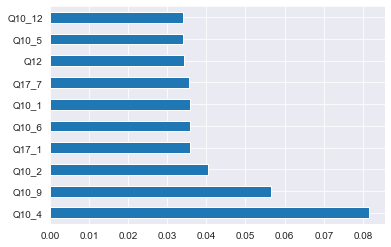

In [111]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [112]:
feat_importances.nlargest(10)

Q10_4     0.081482
Q10_9     0.056470
Q10_2     0.040445
Q17_1     0.035947
Q10_6     0.035778
Q10_1     0.035702
Q17_7     0.035525
Q12       0.034185
Q10_5     0.034110
Q10_12    0.034039
dtype: float64

**Feature Selection with Correlation Matrix Heatmap**

Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

(Naik, 2022)

In [113]:
corr2= dataset_minmax.copy().corr()
corr2

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q10_1,Q10_2,Q10_3,...,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q9
Q1,1.000000,-0.009384,-0.029506,-0.025658,-0.025303,-0.047388,-0.098372,-0.149343,-0.095003,-0.109651,...,-0.002574,-0.024420,-0.024678,-0.058583,-0.033288,-0.057640,-0.162080,-7.141970e-02,-0.060096,-0.164819
Q2,-0.009384,1.000000,0.226202,0.555565,-0.074745,0.071017,0.108246,-0.022689,0.059543,0.117802,...,0.145588,0.127674,0.177416,0.067942,0.037975,0.028312,0.070226,9.194541e-02,0.055372,0.086659
Q3,-0.029506,0.226202,1.000000,0.348822,-0.216695,0.258582,-0.168036,-0.080976,-0.027162,-0.039899,...,-0.088423,0.017118,0.013894,-0.037167,-0.012871,-0.100919,-0.042929,-6.283617e-02,0.129133,-0.129657
Q5,-0.025658,0.555565,0.348822,1.000000,-0.133111,0.083901,0.007897,-0.128825,-0.023393,-0.002465,...,0.040806,-0.049058,0.048116,-0.017459,0.015585,-0.030273,-0.000795,-3.721192e-02,-0.027997,-0.000081
Q6,-0.025303,-0.074745,-0.216695,-0.133111,1.000000,-0.369625,0.092988,-0.022513,0.013408,0.106560,...,0.080645,0.080557,-0.002865,-0.010634,0.104404,0.155098,-0.072923,7.476214e-02,0.235027,0.003679
Q7,-0.047388,0.071017,0.258582,0.083901,-0.369625,1.000000,-0.138166,0.047732,0.037319,-0.040426,...,-0.011757,0.012360,0.068770,0.132507,0.014222,-0.035702,0.025869,3.584139e-02,0.059829,0.034349
Q8,-0.098372,0.108246,-0.168036,0.007897,0.092988,-0.138166,1.000000,0.118186,-0.072275,0.030153,...,0.113442,0.000587,-0.061136,-0.036876,-0.014768,-0.094410,-0.016228,-2.034113e-02,-0.230343,0.054776
Q10_1,-0.149343,-0.022689,-0.080976,-0.128825,-0.022513,0.047732,0.118186,1.000000,0.260691,0.226707,...,0.214340,0.271298,0.222578,0.318568,0.170395,0.105366,0.318234,2.705525e-01,0.171528,0.470365
Q10_2,-0.095003,0.059543,-0.027162,-0.023393,0.013408,0.037319,-0.072275,0.260691,1.000000,0.260939,...,0.116359,0.149597,0.197653,0.160478,0.099223,0.141314,0.139893,1.918519e-01,0.100065,0.275009
Q10_3,-0.109651,0.117802,-0.039899,-0.002465,0.106560,-0.040426,0.030153,0.226707,0.260939,1.000000,...,0.121698,0.136908,0.151253,0.116714,0.103434,0.132198,-0.028539,1.838337e-02,0.117979,0.215428


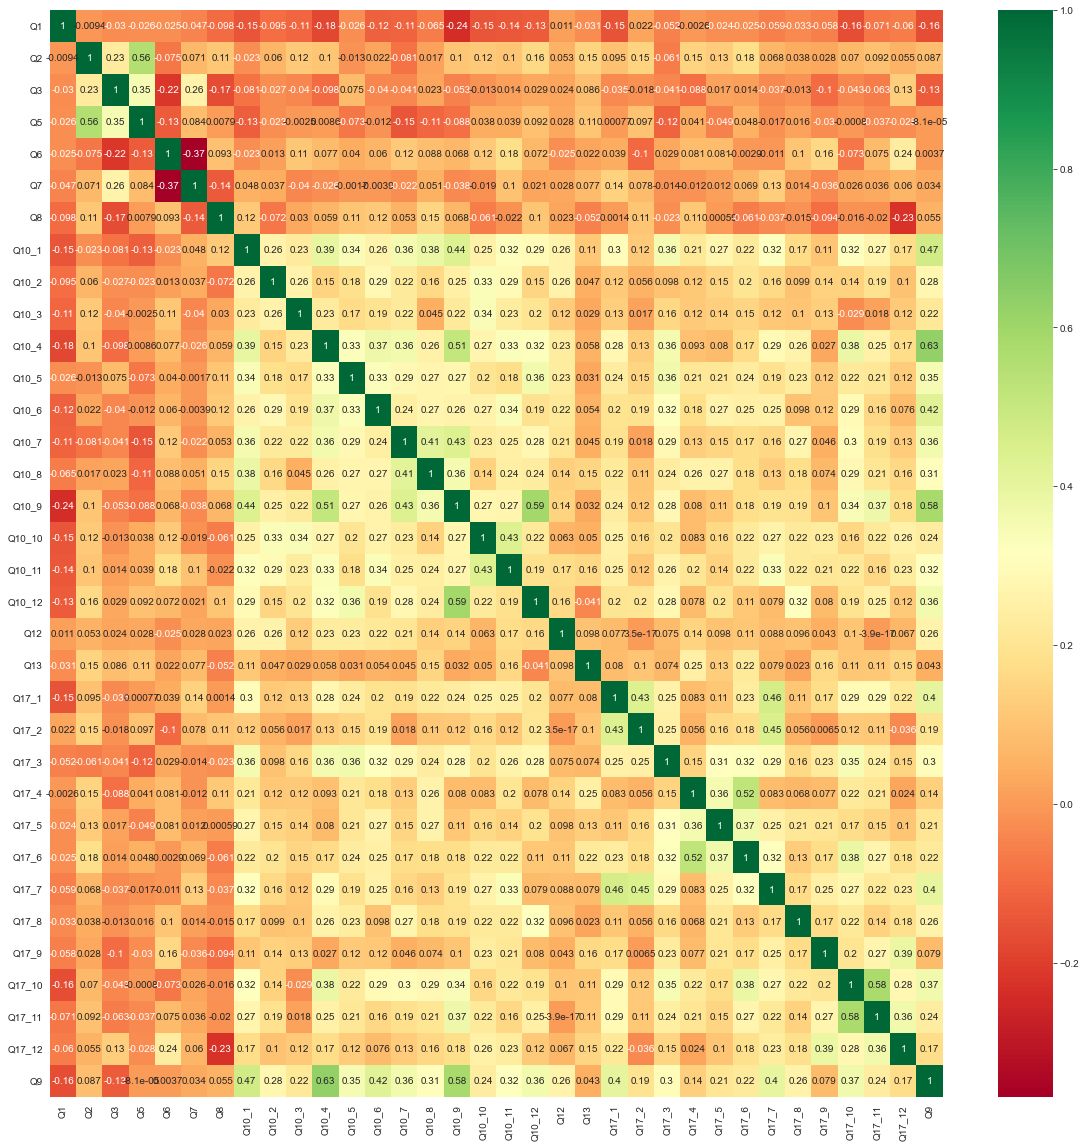

In [114]:
#sns.heatmap(corr1, annot=True)

top_corr_features = corr2.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(dataset_1[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [115]:
data_corr = dataset_1[top_corr_features].corr()

In [116]:
corr_top = data_corr.nlargest(11, 'Q9')
corr_top['Q9']

Q9        1.000000
Q10_4     0.629963
Q10_9     0.577683
Q10_1     0.470365
Q10_6     0.424913
Q17_1     0.403760
Q17_7     0.395752
Q17_10    0.368613
Q10_12    0.360038
Q10_7     0.358145
Q10_5     0.350746
Name: Q9, dtype: float64

In conclusion, when comparing the three feature selection techniques, it was decided to use Univariate selection, 
because it has more fields related to the output.


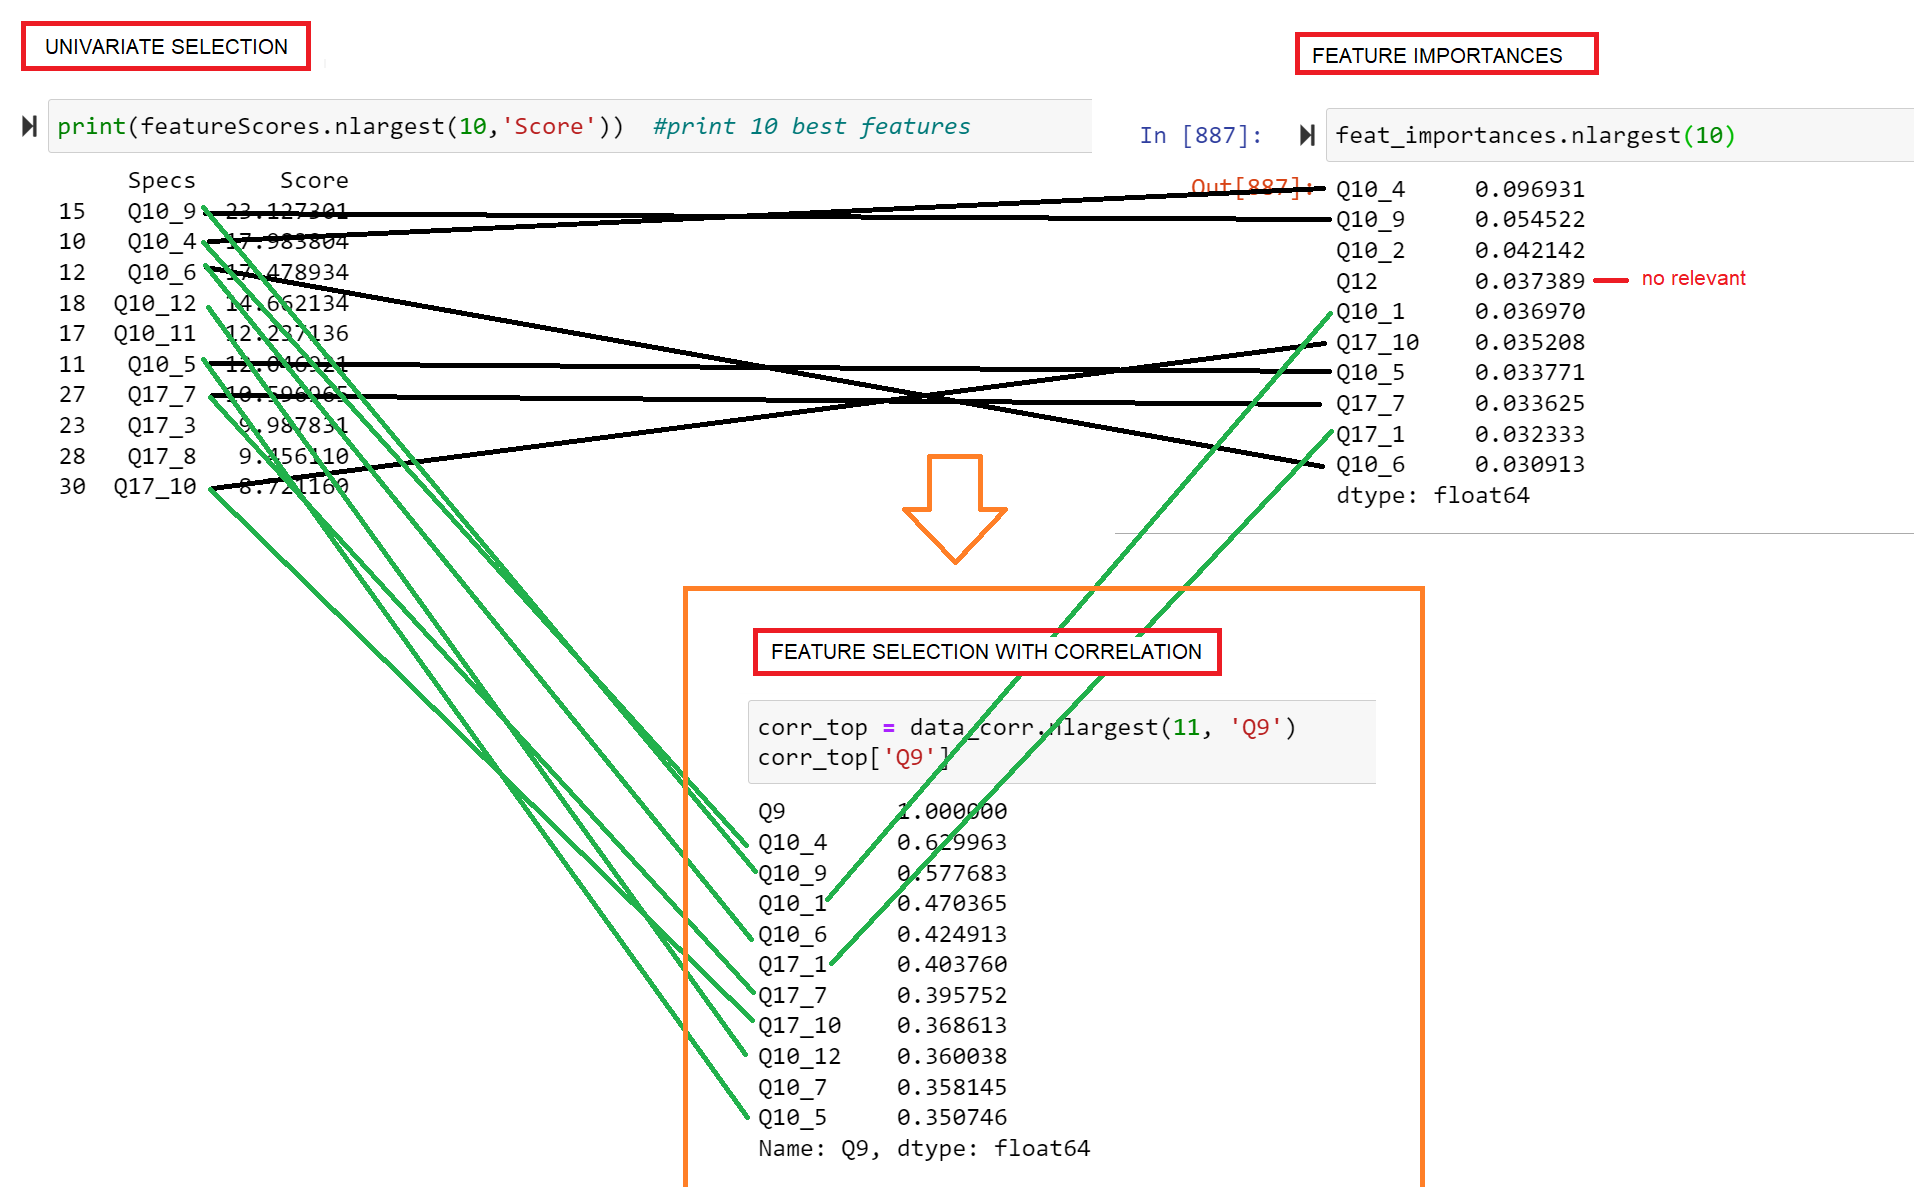

In [117]:
dataset_1.columns

Index(['Q1', 'Q2', 'Q3', 'Q5', 'Q6', 'Q7', 'Q8', 'Q10_1', 'Q10_2', 'Q10_3',
       'Q10_4', 'Q10_5', 'Q10_6', 'Q10_7', 'Q10_8', 'Q10_9', 'Q10_10',
       'Q10_11', 'Q10_12', 'Q12', 'Q13', 'Q17_1', 'Q17_2', 'Q17_3', 'Q17_4',
       'Q17_5', 'Q17_6', 'Q17_7', 'Q17_8', 'Q17_9', 'Q17_10', 'Q17_11',
       'Q17_12', 'Q9'],
      dtype='object')

In [118]:
#dataset_minmax.columns

In [119]:
dataset_minmax.sample(5)

,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q10_1,Q10_2,Q10_3,...,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q9
111,0.0,0.50,0.25,1.0,0.333333,0.000000,0.555556,0.50,0.25,0.50,...,0.25,0.00,0.00,0.25,0.00,0.50,0.75,0.75,0.25,0.333333
32,0.0,0.00,0.00,0.0,0.333333,0.333333,0.555556,0.75,0.50,1.00,...,0.50,0.75,0.50,0.75,0.25,0.50,0.75,0.50,0.00,1.000000
195,0.5,0.00,0.00,0.0,0.333333,0.333333,0.555556,0.75,0.75,0.25,...,0.25,0.25,0.25,0.75,0.50,1.00,1.00,1.00,0.00,0.666667
27,0.0,0.75,1.00,1.0,0.333333,1.000000,0.888889,0.75,1.00,0.50,...,0.50,0.25,1.00,1.00,0.00,0.50,1.00,0.50,0.50,0.666667
101,0.0,0.00,0.00,0.0,1.000000,0.000000,0.111111,0.75,0.50,0.25,...,0.50,0.50,0.25,0.50,0.75,0.75,0.75,0.75,0.50,0.333333


In [120]:
dataset_sel = dataset_1.copy()

In [121]:
dataset_sel.drop(columns =['Q1', 'Q2', 'Q3', 'Q5', 'Q6', 'Q7', 'Q8', 'Q10_2', 'Q10_3', 'Q10_8', 'Q10_10',
                           'Q10_11', 'Q12', 'Q13', 'Q17_2', 'Q17_3', 'Q17_4', 'Q17_5', 'Q17_6', 'Q17_8', 
                           'Q17_9', 'Q17_11', 'Q17_12'], inplace = True)

In [122]:
dataset_sel.sample(5)

,Q10_1,Q10_4,Q10_5,Q10_6,Q10_7,Q10_9,Q10_12,Q17_1,Q17_7,Q17_10,Q9
57,3,3,2,2,2,2,1,5,5,3,4
13,3,4,2,2,3,3,2,4,4,4,4
4,3,4,2,2,4,4,3,3,3,3,3
103,4,4,4,4,3,4,5,4,5,5,4
164,3,5,5,3,4,5,3,5,4,4,5


## Multiple Model Accuracy

### First evaluation with Feature Selection by Correlation Matrix

### Create a Validation Dataset

In [123]:
dataset_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q10_1   218 non-null    int64
 1   Q10_4   218 non-null    int64
 2   Q10_5   218 non-null    int64
 3   Q10_6   218 non-null    int64
 4   Q10_7   218 non-null    int64
 5   Q10_9   218 non-null    int64
 6   Q10_12  218 non-null    int64
 7   Q17_1   218 non-null    int64
 8   Q17_7   218 non-null    int64
 9   Q17_10  218 non-null    int64
 10  Q9      218 non-null    int64
dtypes: int64(11)
memory usage: 18.9 KB


### Generate test design (Data set division)

In [124]:
array = dataset_sel.values
X = array[:,0:10]
y = array[:,10]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

### Build Models

Test for 6 different algorithms:
    
1. Logistic Regression (LR)
2. Linear Discriminant Analysis (LDA)
3. K-Nearest Neighbors (KNN).
4. Classification and Regression Trees (CART).
5. Gaussian Naive Bayes (NB).
6. Support Vector Machines (SVM).

In [125]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

Evaluate each model in turn

In [126]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=4, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.551797 (0.046421)
LDA: 0.614165 (0.079165)
KNN: 0.517045 (0.038472)
CART: 0.506607 (0.076496)
NB: 0.631739 (0.051850)
SVM: 0.591702 (0.028408)


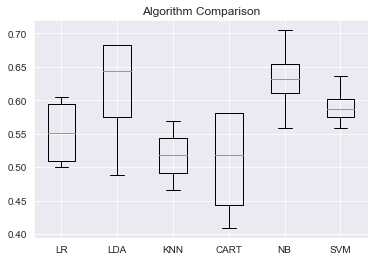

In [127]:
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

## Evaluations of algorithms

In [128]:
dataset_sel.sample(5)

,Q10_1,Q10_4,Q10_5,Q10_6,Q10_7,Q10_9,Q10_12,Q17_1,Q17_7,Q17_10,Q9
211,4,5,4,4,3,3,2,3,2,5,4
82,4,5,5,4,3,2,1,5,5,4,4
112,2,3,3,2,3,1,2,3,1,3,2
200,3,5,4,5,4,1,1,5,5,2,4
79,4,5,3,3,2,2,1,4,5,5,5


In [129]:
dataset_sel.columns

Index(['Q10_1', 'Q10_4', 'Q10_5', 'Q10_6', 'Q10_7', 'Q10_9', 'Q10_12', 'Q17_1',
       'Q17_7', 'Q17_10', 'Q9'],
      dtype='object')

In [130]:
dataset_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q10_1   218 non-null    int64
 1   Q10_4   218 non-null    int64
 2   Q10_5   218 non-null    int64
 3   Q10_6   218 non-null    int64
 4   Q10_7   218 non-null    int64
 5   Q10_9   218 non-null    int64
 6   Q10_12  218 non-null    int64
 7   Q17_1   218 non-null    int64
 8   Q17_7   218 non-null    int64
 9   Q17_10  218 non-null    int64
 10  Q9      218 non-null    int64
dtypes: int64(11)
memory usage: 18.9 KB


In [131]:
#dataset_1.info()

### Generate test design (Data set division)

In [132]:
dataset_pivot = dataset_sel.copy()

In [133]:
array =  dataset_pivot.values #dataset_1.values
X = array[:,0:10]
y = array[:,10]


In [134]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold

selection = VarianceThreshold(threshold=(0.1))    
X = selection.fit_transform(X)
X.shape

(218, 10)

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [136]:
#X_train.shape, X_test.shape,  y_train.shape, y_test.shape 

print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')

X_train : (174, 10)
y_train : (174,)
X_test : (44, 10)
y_test : (44,)


### Hyperparameter Using Grid Search - K nearest neighbors

In [137]:
# step-1: specify range of hyperparameters to tune
hyper_params = [{'n_neighbors': list(range(1,11))}]

In [138]:
# step-2: perform grid search
# 2.1 specify model
knn_Model = KNeighborsClassifier()
          

# 2.2 call GridSearchCV()
modelknn_cv = GridSearchCV(estimator = knn_Model, 
                        param_grid = hyper_params, 
                        
                        return_train_score=True)      

# fit the model
modelknn_cv.fit(X_train, y_train) 

C:\Users\Jose\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
             return_train_score=True)

In [139]:
# cv results
cv_resultsknn = pd.DataFrame(modelknn_cv.cv_results_)
cv_resultsknn

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000400,0.000799,0.002793,0.000399,1,{'n_neighbors': 1},0.514286,0.428571,0.514286,0.514286,...,0.506050,0.042406,8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.000590,0.000482,0.003390,0.002327,2,{'n_neighbors': 2},0.485714,0.428571,0.485714,0.457143,...,0.477311,0.033580,10,0.776978,0.769784,0.748201,0.769784,0.785714,0.770092,0.012417
2,0.000199,0.000398,0.001596,0.000798,3,{'n_neighbors': 3},0.400000,0.571429,0.514286,0.428571,...,0.500504,0.075090,9,0.769784,0.733813,0.726619,0.776978,0.757143,0.752867,0.019687
3,0.000000,0.000000,0.000000,0.000000,4,{'n_neighbors': 4},0.600000,0.571429,0.628571,0.428571,...,0.539832,0.077028,7,0.683453,0.690647,0.690647,0.719424,0.714286,0.699692,0.014350
4,0.000799,0.000399,0.004450,0.002627,5,{'n_neighbors': 5},0.485714,0.542857,0.628571,0.457143,...,0.546387,0.068543,6,0.683453,0.654676,0.733813,0.719424,0.685714,0.695416,0.028099
5,0.000199,0.000399,0.000399,0.000798,6,{'n_neighbors': 6},0.628571,0.571429,0.600000,0.485714,...,0.563025,0.050677,5,0.661871,0.633094,0.712230,0.726619,0.664286,0.679620,0.034604
6,0.000000,0.000000,0.006249,0.007654,7,{'n_neighbors': 7},0.657143,0.600000,0.657143,0.485714,...,0.603529,0.062994,1,0.661871,0.654676,0.712230,0.719424,0.664286,0.682497,0.027491
7,0.003125,0.006250,0.003124,0.006247,8,{'n_neighbors': 8},0.657143,0.514286,0.685714,0.485714,...,0.580336,0.078463,3,0.654676,0.690647,0.726619,0.719424,0.635714,0.685416,0.035487
8,0.000000,0.000000,0.000000,0.000000,9,{'n_neighbors': 9},0.685714,0.571429,0.600000,0.485714,...,0.586218,0.063896,2,0.683453,0.683453,0.690647,0.705036,0.685714,0.689661,0.008124
9,0.000000,0.000000,0.003125,0.006249,10,{'n_neighbors': 10},0.628571,0.600000,0.600000,0.485714,...,0.568739,0.052866,4,0.705036,0.683453,0.669065,0.705036,0.678571,0.688232,0.014480


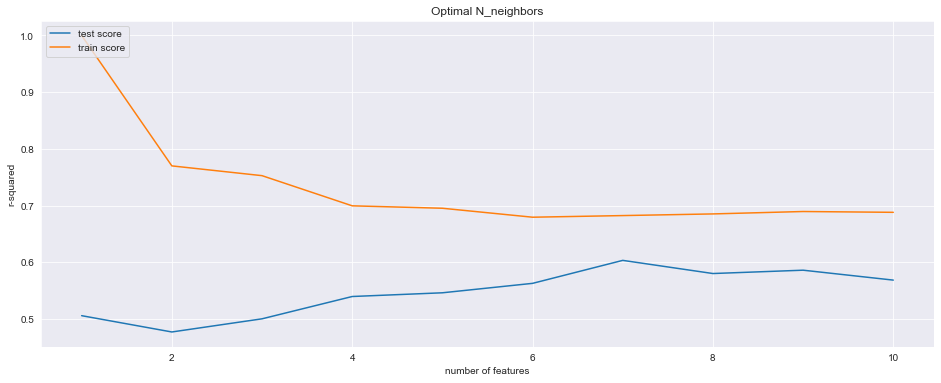

In [140]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_resultsknn["param_n_neighbors"], cv_resultsknn["mean_test_score"])
plt.plot(cv_resultsknn["param_n_neighbors"], cv_resultsknn["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal N_neighbors")
plt.legend(['test score', 'train score'], loc='upper left')

In [141]:
pprint(modelknn_cv.best_params_)

{'n_neighbors': 7}


### Hyperparameter Using Grid Search - DecisionTree

In [181]:
# step-1: specify range of hyperparameters to tune
hyper_params = [{'max_depth': list(range(1,11))}]

In [219]:
# step-2: perform grid search
# 2.1 specify model
dt_Model = DecisionTreeClassifier()
          

# 2.2 call GridSearchCV()
modeldt_cv = GridSearchCV(estimator = dt_Model, 
                        param_grid = hyper_params, 
                        return_train_score=True)      

# fit the model
modeldt_cv.fit(X_train, y_train) 

C:\Users\Jose\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
             return_train_score=True)

In [220]:
# cv results
cv_resultsdt = pd.DataFrame(modeldt_cv.cv_results_)
cv_resultsdt

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000797,0.000399,0.000600,0.000490,1,{'max_depth': 1},0.571429,0.542857,0.600000,0.542857,...,0.563193,0.021301,7,0.597122,0.604317,0.618705,0.553957,0.550000,0.584820,0.027729
1,0.000790,0.000395,0.000599,0.000489,2,{'max_depth': 2},0.600000,0.485714,0.571429,0.628571,...,0.574790,0.048279,5,0.618705,0.633094,0.654676,0.654676,0.664286,0.645087,0.016687
2,0.000591,0.000483,0.000399,0.000489,3,{'max_depth': 3},0.571429,0.542857,0.571429,0.628571,...,0.580504,0.028115,4,0.705036,0.697842,0.676259,0.690647,0.700000,0.693957,0.009985
3,0.000599,0.000489,0.000000,0.000000,4,{'max_depth': 4},0.657143,0.542857,0.514286,0.628571,...,0.597983,0.058117,3,0.769784,0.733813,0.719424,0.755396,0.764286,0.748541,0.019031
4,0.000598,0.000488,0.000000,0.000000,5,{'max_depth': 5},0.657143,0.514286,0.657143,0.571429,...,0.603529,0.054668,2,0.812950,0.791367,0.791367,0.812950,0.828571,0.807441,0.014310
5,0.001005,0.000015,0.000400,0.000489,6,{'max_depth': 6},0.628571,0.571429,0.685714,0.600000,...,0.620672,0.037827,1,0.870504,0.863309,0.848921,0.856115,0.857143,0.859198,0.007267
6,0.000797,0.000399,0.000598,0.000489,7,{'max_depth': 7},0.600000,0.514286,0.714286,0.514286,...,0.574454,0.076779,6,0.913669,0.913669,0.892086,0.884892,0.892857,0.899435,0.011950
7,0.000805,0.000403,0.000199,0.000399,8,{'max_depth': 8},0.485714,0.514286,0.628571,0.485714,...,0.540504,0.057837,8,0.956835,0.928058,0.935252,0.920863,0.928571,0.933916,0.012331
8,0.000598,0.000488,0.000598,0.000489,9,{'max_depth': 9},0.457143,0.457143,0.600000,0.571429,...,0.523025,0.058292,10,0.985612,0.956835,0.964029,0.964029,0.971429,0.968386,0.009771
9,0.001397,0.000487,0.001869,0.000781,10,{'max_depth': 10},0.457143,0.457143,0.657143,0.542857,...,0.534622,0.074392,9,0.992806,0.964029,0.985612,0.985612,0.978571,0.981326,0.009750


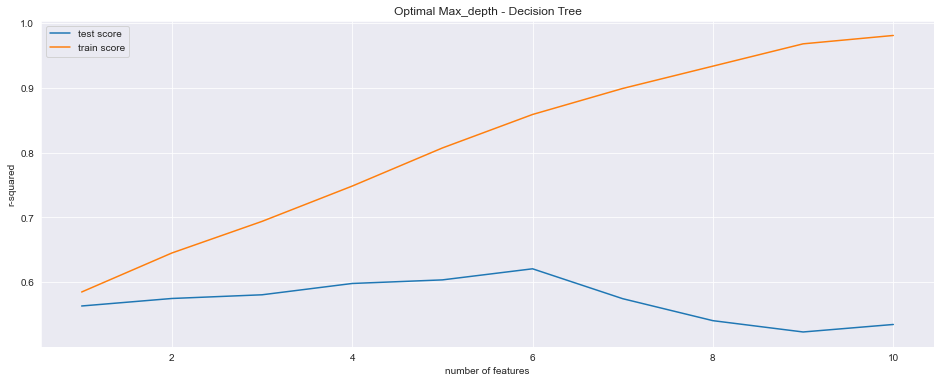

In [221]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_resultsdt["param_max_depth"], cv_resultsdt["mean_test_score"])
plt.plot(cv_resultsdt["param_max_depth"], cv_resultsdt["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Max_depth - Decision Tree")
plt.legend(['test score', 'train score'], loc='upper left')

In [222]:
pprint(modeldt_cv.best_params_)

{'max_depth': 6}


### Hyperparameter Using Grid Search - Random Forest

In [236]:
# step-1: specify range of hyperparameters to tune
hyper_params = [{'n_estimators': list(range(1, 11))}]

In [248]:
# step-2: perform grid search
# 2.1 specify model
rf_Model1 = RandomForestClassifier()
          

# 2.2 call GridSearchCV()
modelrf_cv = GridSearchCV(estimator = rf_Model1, 
                        param_grid = hyper_params, 
                        cv = 3, 
                        verbose = 2,
                        n_jobs = 4,
                        return_train_score=True)      
# fit the model
modelrf_cv.fit(X_train, y_train) 


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  23 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    0.2s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid=[{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
             return_train_score=True, verbose=2)

In [249]:
# cv results
cv_results1 = pd.DataFrame(modelrf_cv.cv_results_)
cv_results1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.003657,0.000469,0.001329,4.706960e-04,1,{'n_estimators': 1},0.413793,0.568966,0.448276,0.477011,0.066528,10,0.844828,0.784483,0.844828,0.824713,0.028447
1,0.006648,0.000472,0.001330,4.706962e-04,2,{'n_estimators': 2},0.448276,0.551724,0.500000,0.500000,0.042233,6,0.810345,0.827586,0.775862,0.804598,0.021504
2,0.009308,0.000470,0.001330,4.706401e-04,3,{'n_estimators': 3},0.482759,0.517241,0.448276,0.482759,0.028155,8,0.913793,0.922414,0.956897,0.931034,0.018623
3,0.011969,0.000814,0.001330,4.697407e-04,4,{'n_estimators': 4},0.534483,0.482759,0.568966,0.528736,0.035428,5,0.956897,0.913793,0.896552,0.922414,0.025379
4,0.014961,0.001412,0.001994,4.052337e-07,5,{'n_estimators': 5},0.396552,0.500000,0.551724,0.482759,0.064511,8,0.948276,0.965517,0.939655,0.951149,0.010752
5,0.021609,0.003083,0.003989,3.550126e-03,6,{'n_estimators': 6},0.551724,0.500000,0.655172,0.568966,0.064511,2,0.948276,0.939655,0.948276,0.945402,0.004064
6,0.025931,0.008463,0.002326,4.701340e-04,7,{'n_estimators': 7},0.482759,0.551724,0.465517,0.500000,0.037246,6,0.965517,0.965517,0.982759,0.971264,0.008128
7,0.037895,0.010590,0.003657,9.407182e-04,8,{'n_estimators': 8},0.586207,0.586207,0.586207,0.586207,0.000000,1,0.974138,0.965517,0.982759,0.974138,0.007039
8,0.028249,0.001695,0.002992,8.144908e-04,9,{'n_estimators': 9},0.603448,0.482759,0.517241,0.534483,0.050757,4,0.991379,0.965517,0.965517,0.974138,0.012191
9,0.031916,0.002155,0.003656,4.709211e-04,10,{'n_estimators': 10},0.551724,0.586207,0.568966,0.568966,0.014078,2,0.991379,0.991379,0.982759,0.988506,0.004064


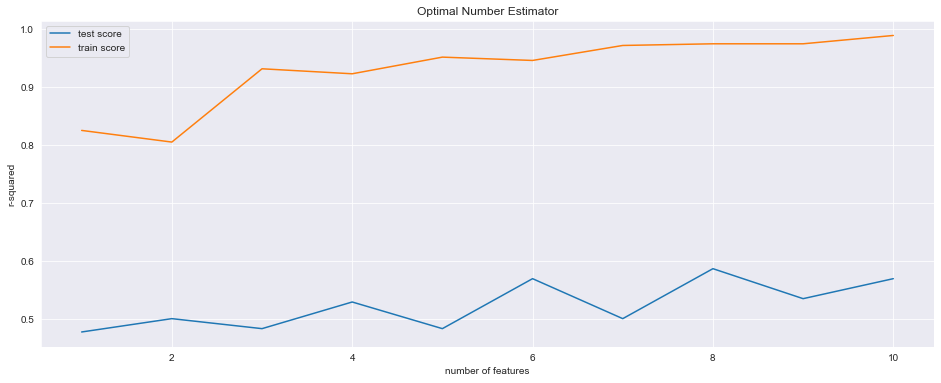

In [250]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results1["param_n_estimators"], cv_results1["mean_test_score"])
plt.plot(cv_results1["param_n_estimators"], cv_results1["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number Estimator")
plt.legend(['test score', 'train score'], loc='upper left')

In [251]:
pprint(modelrf_cv.best_params_)

{'n_estimators': 8}


## Build Classification models

In [252]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn import metrics

#### K nearest neighbors

In [707]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(7) # Define classifier
knn.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Training set performance
knn_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
knn_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
knn_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
knn_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
knn_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
knn_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('K nearest neighbors')
print('----------------------------------')
print('Model performance for Training set')
print('- Accuracy: %s' % knn_train_accuracy)
print('- MCC: %s' % knn_train_mcc)
print('- F1 score: %s' % knn_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % knn_test_accuracy)
print('- MCC: %s' % knn_test_mcc)
print('- F1 score: %s' % knn_test_f1)
print('----------------------------------')
print('Evaluating the Algorithm')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred ))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred ))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

K nearest neighbors
----------------------------------
Model performance for Training set
- Accuracy: 0.6666666666666666
- MCC: 0.42636031866445345
- F1 score: 0.6564464316964302
----------------------------------
Model performance for Test set
- Accuracy: 0.6136363636363636
- MCC: 0.31546542357865043
- F1 score: 0.5659536541889483
----------------------------------
Evaluating the Algorithm
Mean Absolute Error: 0.38636363636363635
Mean Squared Error: 0.38636363636363635
Root Mean Squared Error: 0.621581560508061


In [760]:
print('K nearest neighbors - Parameters')
print('----------------------------------')
pprint(knn.get_params())

K nearest neighbors - Parameters
----------------------------------
{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 7,
 'p': 2,
 'weights': 'uniform'}


#### Decision tree

In [714]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 6) # Define classifier
dt.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Training set performance
dt_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
dt_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
dt_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
dt_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
dt_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
dt_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Decision tree')
print('----------------------------------')
print('Model performance for Training set')
print('- Accuracy: %s' % dt_train_accuracy)
print('- MCC: %s' % dt_train_mcc)
print('- F1 score: %s' % dt_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % dt_test_accuracy)
print('- MCC: %s' % dt_test_mcc)
print('- F1 score: %s' % dt_test_f1)
print('----------------------------------')
print('Evaluating the Algorithm')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred ))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred ))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Decision tree
----------------------------------
Model performance for Training set
- Accuracy: 0.8563218390804598
- MCC: 0.7566163748422178
- F1 score: 0.8539471297349891
----------------------------------
Model performance for Test set
- Accuracy: 0.6136363636363636
- MCC: 0.30633122542052443
- F1 score: 0.5632481924854806
----------------------------------
Evaluating the Algorithm
Mean Absolute Error: 0.38636363636363635
Mean Squared Error: 0.38636363636363635
Root Mean Squared Error: 0.621581560508061


In [761]:
print('Decision tree - Parameters')
print('----------------------------------')
pprint(dt.get_params())

Decision tree - Parameters
----------------------------------
{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}


#### Random forest

In [662]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=8) # Define classifier
rf.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Training set performance
rf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
rf_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
rf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
rf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
rf_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
rf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Random Forest')
print('----------------------------------')
print('Model performance for Training set')
print('- Accuracy: %s' % rf_train_accuracy)
print('- MCC: %s' % rf_train_mcc)
print('- F1 score: %s' % rf_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % rf_test_accuracy)
print('- MCC: %s' % rf_test_mcc)
print('- F1 score: %s' % rf_test_f1)
print('----------------------------------')
print('Evaluating the Algorithm')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred ))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred ))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Random Forest
----------------------------------
Model performance for Training set
- Accuracy: 0.9885057471264368
- MCC: 0.9808557113364228
- F1 score: 0.988484399051696
----------------------------------
Model performance for Test set
- Accuracy: 0.6590909090909091
- MCC: 0.43656904896382104
- F1 score: 0.6473808010171648
----------------------------------
Evaluating the Algorithm
Mean Absolute Error: 0.3409090909090909
Mean Squared Error: 0.3409090909090909
Root Mean Squared Error: 0.5838742081211422


In [762]:
print('Random Forest - Parameters')
print('----------------------------------')
pprint(rf.get_params())

Random Forest - Parameters
----------------------------------
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 8,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


#### Neural network

In [668]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha=1, max_iter=1000)
mlp.fit(X_train, y_train)

# Make predictions
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

# Training set performance
mlp_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
mlp_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
mlp_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
mlp_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
mlp_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
mlp_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Neural network')
print('----------------------------------')
print('Model performance for Training set')
print('- Accuracy: %s' % mlp_train_accuracy)
print('- MCC: %s' % mlp_train_mcc)
print('- F1 score: %s' % mlp_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % mlp_test_accuracy)
print('- MCC: %s' % mlp_test_mcc)
print('- F1 score: %s' % mlp_test_f1)
print('----------------------------------')
print('Evaluating the Algorithm')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred ))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred ))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Neural network
----------------------------------
Model performance for Training set
- Accuracy: 0.8505747126436781
- MCC: 0.7453326822782701
- F1 score: 0.8455288079230826
----------------------------------
Model performance for Test set
- Accuracy: 0.5454545454545454
- MCC: 0.1740242113090467
- F1 score: 0.49925239234449764
----------------------------------
Evaluating the Algorithm
Mean Absolute Error: 0.45454545454545453
Mean Squared Error: 0.45454545454545453
Root Mean Squared Error: 0.674199862463242


C:\Users\Jose\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [465]:
print('Neural network - Parameters')
print('----------------------------------')
pprint(mlp.get_params())

Neural network - Parameters
----------------------------------
{'activation': 'relu',
 'alpha': 1,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}


#### Build Stacked model

In [764]:
# Define estimators
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimator_list = [
    ('knn',knn),
    ('dt',dt),
    ('rf',rf),
    ('mlp',mlp) ]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

# Train stacked model
stack_model.fit(X_train, y_train)

# Make predictions
y_train_pred = stack_model.predict(X_train)
y_test_pred = stack_model.predict(X_test)

# Training set model performance
stack_model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
stack_model_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
stack_model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set model performance
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
stack_model_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
stack_model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score


print('Stacking Model')
print('----------------------------------')
print('Model performance for Training set')
print('- Accuracy: %s' % stack_model_train_accuracy)
print('- MCC: %s' % stack_model_train_mcc)
print('- F1 score: %s' % stack_model_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % stack_model_test_accuracy)
print('- MCC: %s' % stack_model_test_mcc)
print('- F1 score: %s' % stack_model_test_f1)
print('----------------------------------')
print('Evaluating the Algorithm')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred ))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred ))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

C:\Users\Jose\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Jose\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Jose\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Jose\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Jose\anaconda3\lib\site-packages\sklearn\mode

Stacking Model
----------------------------------
Model performance for Training set
- Accuracy: 0.8448275862068966
- MCC: 0.7349141289288403
- F1 score: 0.8312315301746283
----------------------------------
Model performance for Test set
- Accuracy: 0.6590909090909091
- MCC: 0.4012214601128163
- F1 score: 0.5939787485242031
----------------------------------
Evaluating the Algorithm
Mean Absolute Error: 0.3409090909090909
Mean Squared Error: 0.3409090909090909
Root Mean Squared Error: 0.5838742081211422


C:\Users\Jose\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [765]:
print('Stacking Model')
print('----------------------------------')
pprint(stack_model.get_params())

Stacking Model
----------------------------------
{'cv': None,
 'dt': DecisionTreeClassifier(max_depth=6),
 'dt__ccp_alpha': 0.0,
 'dt__class_weight': None,
 'dt__criterion': 'gini',
 'dt__max_depth': 6,
 'dt__max_features': None,
 'dt__max_leaf_nodes': None,
 'dt__min_impurity_decrease': 0.0,
 'dt__min_impurity_split': None,
 'dt__min_samples_leaf': 1,
 'dt__min_samples_split': 2,
 'dt__min_weight_fraction_leaf': 0.0,
 'dt__presort': 'deprecated',
 'dt__random_state': None,
 'dt__splitter': 'best',
 'estimators': [('knn', KNeighborsClassifier(n_neighbors=7)),
                ('dt', DecisionTreeClassifier(max_depth=6)),
                ('rf', RandomForestClassifier(n_estimators=8)),
                ('mlp', MLPClassifier(alpha=1, max_iter=1000))],
 'final_estimator': LogisticRegression(),
 'final_estimator__C': 1.0,
 'final_estimator__class_weight': None,
 'final_estimator__dual': False,
 'final_estimator__fit_intercept': True,
 'final_estimator__intercept_scaling': 1,
 'final_estimator

#### Results

In [786]:
### Results

acc_train_list = {'knn':knn_train_accuracy,
'dt': dt_train_accuracy,
'rf': rf_train_accuracy,
'nn': mlp_train_accuracy,
'stack': stack_model_train_accuracy}

mcc_train_list = {'knn':knn_train_mcc,
'dt': dt_train_mcc,
'rf': rf_train_mcc,
'nn': mlp_train_mcc,
'stack': stack_model_train_mcc}

f1_train_list = {'knn':knn_train_f1,
'dt': dt_train_f1,
'rf': rf_train_f1,
'nn': mlp_train_f1,
'stack': stack_model_train_f1}

In [787]:
pprint(acc_train_list)

{'dt': 0.8563218390804598,
 'knn': 0.6666666666666666,
 'nn': 0.8505747126436781,
 'rf': 0.9885057471264368,
 'stack': 0.8448275862068966}


In [788]:
acc_df = pd.DataFrame.from_dict(acc_train_list, orient='index', columns=['Accuracy'])
mcc_df = pd.DataFrame.from_dict(mcc_train_list, orient='index', columns=['MCC'])
f1_df = pd.DataFrame.from_dict(f1_train_list, orient='index', columns=['F1'])
df = pd.concat([acc_df, mcc_df, f1_df], axis=1)
df

,Accuracy,MCC,F1
knn,0.666667,0.426360,0.656446
dt,0.856322,0.756616,0.853947
rf,0.988506,0.980856,0.988484
nn,0.850575,0.745333,0.845529
stack,0.844828,0.734914,0.831232


In [2]:
df_acc = pd.DataFrame(acc_df)
df_acc

NameError: name 'pd' is not defined

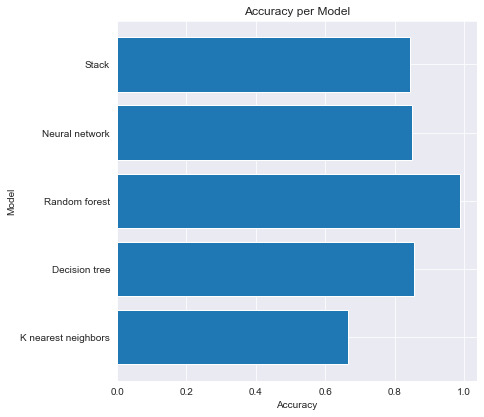

In [770]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
models = ['K nearest neighbors', 
          'Decision tree', 
          'Random forest', 
          'Neural network', 
          'Stack']
resultsm = df_acc['Accuracy']
ax.barh(models,resultsm)
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Accuracy per Model')
plt.show()

In [771]:
# store resuts in a file
df.to_csv('results.csv')

### Create files and store data

In [772]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_Classifier_model.pkl', 'wb')

# Saving model to disk
# dump information to that file
pickle.dump(rf, file)
file.close()

In [773]:
# open a file, where you ant to store the data
file = open('K_nearest_Neighbors_Classifier_model.pkl', 'wb')

# Saving model to disk
# dump information to that file
pickle.dump(knn, file)
file.close()

In [774]:
# open a file, where you ant to store the data
file = open('Decision_tree_model.pkl', 'wb')

# Saving model to disk
# dump information to that file
pickle.dump(dt, file)
file.close()

In [775]:
# open a file, where you ant to store the data
file = open('Neural_network_model.pkl', 'wb')

# Saving model to disk
# dump information to that file
pickle.dump(mlp, file)
file.close()

In [776]:
# open a file, where you ant to store the data
file = open('Stack_model.pkl', 'wb')

# Saving model to disk
# dump information to that file
pickle.dump(stack_model, file)
file.close()

In [778]:
dataset_sel.tail(10)

,Q10_1,Q10_4,Q10_5,Q10_6,Q10_7,Q10_9,Q10_12,Q17_1,Q17_7,Q17_10,Q9
208,4,4,4,3,3,3,2,4,4,4,4
209,3,4,4,1,1,4,4,5,5,5,4
210,3,3,3,3,3,4,3,4,3,5,4
211,4,5,4,4,3,3,2,3,2,5,4
212,3,2,4,1,3,1,3,3,4,3,2
213,4,5,4,3,4,4,4,3,4,4,5
214,3,2,3,2,3,2,2,3,2,2,2
215,3,3,3,1,1,2,2,3,5,4,3
216,5,4,3,3,3,4,3,3,3,4,4
217,3,4,2,2,3,3,2,4,5,3,4


### Loading model to compare the results

In [781]:
# model Random forest

model_rf = pickle.load(open('random_forest_Classifier_model.pkl','rb'))
model_knn = pickle.load(open('K_nearest_Neighbors_Classifier_model.pkl','rb'))
model_dt = pickle.load(open('Decision_tree_model.pkl','rb'))
model_mlp = pickle.load(open('Neural_network_model.pkl','rb'))
model_stack = pickle.load(open('Stack_model.pkl','rb'))

In [782]:
print(model_rf)
print(model_knn)
print(model_dt)
print(model_mlp)
print(model_stack)

RandomForestClassifier(n_estimators=8)
KNeighborsClassifier(n_neighbors=7)
DecisionTreeClassifier(max_depth=6)
MLPClassifier(alpha=1, max_iter=1000)
StackingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=7)),
                               ('dt', DecisionTreeClassifier(max_depth=6)),
                               ('rf', RandomForestClassifier(n_estimators=8)),
                               ('mlp', MLPClassifier(alpha=1, max_iter=1000))],
                   final_estimator=LogisticRegression())


In [783]:
print('Random forest: %s' % model_rf.predict([[1,1,1,1,1,1,1,1,1,1]]))
print('K nearest neighbors: %s' % model_knn.predict([[1,1,1,1,1,1,1,1,1,1]]))
print('Decision tree: %s' % model_dt.predict([[1,1,1,1,1,1,1,1,1,1]]))
print('Neural network: %s' %model_mlp.predict([[1,1,1,1,1,1,1,1,1,1]]))
print('Stack: %s' %model_stack.predict([[1,1,1,1,1,1,1,1,1,1]]))

#3,2,3,2,3,2,2,3,2,2


Random forest: [3]
K nearest neighbors: [3]
Decision tree: [3]
Neural network: [3]
Stack: [3]


In [784]:
print('Random forest: %s' % model_rf.predict([[3,2,3,2,3,2,2,3,2,2]]))
print('K nearest neighbors: %s' % model_knn.predict([[3,2,3,2,3,2,2,3,2,2]]))
print('Decision tree: %s' % model_dt.predict([[3,2,3,2,3,2,2,3,2,2]]))
print('Neural network: %s' %model_mlp.predict([[3,2,3,2,3,2,2,3,2,2]]))
print('Stack: %s' %model_stack.predict([[3,2,3,2,3,2,2,3,2,2]]))

Random forest: [2]
K nearest neighbors: [3]
Decision tree: [2]
Neural network: [3]
Stack: [3]
